In [1]:
import dill
import gensim
import os
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns

from nltk.probability import FreqDist

from nltk.stem.porter import PorterStemmer

from nltk.stem import WordNetLemmatizer

from nltk.corpus import stopwords

from gensim.models import FastText

from gensim.models import Word2Vec

import spacy

from gensim.models import Phrases

In [2]:
import collections

In [3]:
from networkx.exception import NetworkXError

In [4]:
from networkx.generators.ego import ego_graph

In [5]:
from chinese_whispers import chinese_whispers, aggregate_clusters

In [6]:
nlp = spacy.load("en_core_web_sm")

In [7]:
def process_text(text):
    my_doc = nlp(text)
    return [w.lemma_.lower() for w in my_doc if not w.is_stop and not w.is_punct and not w.is_digit and w.is_alpha]

In [8]:
model1 = Word2Vec.load("word2vec_model2")

C:\ProgramData\Anaconda3\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [9]:
model1.wv.most_similar('wine')

[('wines', 0.7426118850708008),
 ('wine_list', 0.7194114923477173),
 ('bottle', 0.664490282535553),
 ('pinot_noir', 0.6404286623001099),
 ('sommelier', 0.6329075694084167),
 ('chardonnay', 0.6259419322013855),
 ('merlot', 0.613429069519043),
 ('sauvignon_blanc', 0.6053673624992371),
 ('bottle_wine', 0.6018390655517578),
 ('prosecco', 0.5961366295814514)]

In [10]:
#read data
df = pd.read_csv (r'C:\Users\siddhartha\Desktop\Tag Extraction Automation\V1 - Work\dinein+Langid+i13set2.csv')

In [11]:
#filter only english data
is_df_en = df['review_langid']== 'en'
df = df[is_df_en]
df = df.head(1000)
#review text_en as DF
df = df[['review_text']]
df

review_text
1     Vacationing from America. Great Steaks!  Excel...
3     We came into Olive Garden for a late dinner af...
4     I was part of a group when we went to Aya this...
7     Be prepare for a long wait. Basement can house...
8     The crepes here are the best we had for our st...
9     Excellent choice of Lebanese food to eat and t...
10    From all the fantastic reviews I had viewed be...
11    I used to go to this pub years ago and it was ...
12    My friend &amp; I decided to come for a cockta...
13    Two friends and I visited for the Tale as old ...
14    I came here with my friends for a dinner and w...
17    good quality food though not exceptional. Very...
18    Big screen, good happy hours, good food, good ...
19    It is literally lobsters or burgers . Casual p...
20    Visited on a Saturday evening. My girlfriend h...
22    My wife and I treated our selves to a fantasti...
23    We got here with a large group of about 10 and...
24    If doing the same thing again and again expect...
25    The was manic busy, about 20 minute wait, we w...
27    Loved it. Great entertainment, and the meatloa...
28    Love the team. Everyone seems happy and cheerf...
29    Had a really enjoyable visit for brunch, food ...
30    Went along to the Cargo club on a Friday night...
33    There are two reviews set up for this restaura...
34    Came here about 6.30 on a Saturday. We were qu...
35    Mr. Chow has always been a safe call but recen...
36    Visited the place with my fiancé upon learning...
37    Love this place, you should go starving so you...
38    Set at the base of the Eiffel tower, you have ...
40    Really enjoyed the food-loved the venison puff...
...                                                 ...
1398  We ate here when staying on site, and the food...
1399  Excellent View from the rooftop level 43 , the...
1400  Amazing food!!!!! Service is top notch!! Didn'...
1401  THE WORST CUSTOMER SERVICE EVER AND MAJOR ATTI...
1402  We arrived in WDC from Denver yesterday evenin...
1403  Ellen's absolutely made our family trip to NY!...
1404  Good Indian food. Chicken and Paneer dishes we...
1405  I discover this place today and I tell you, it...
1406  We used Yelp to find an Italian restaurant nea...
1407  Probably my favorite meal!! Had the salmon and...
1408  Amazing cocktails excellent service  menu remi...
1412  I was taken here for a birthday meal experienc...
1413  Overlooking the waterway, and thought this wou...
1414  Went to M Resturant on Saturday as part of The...
1415  Restaurants in London, in my experience, are m...
1416  Went for lunch. The savoury tarts are deliciou...
1417  Wonderful fresh juices and great sandwiches wi...
1418  Loved the atmosphere, good music, good  drinks...
1420  Me and my family always visit chimichanga and ...
1421  I've eaten out a fair amount in and around Cap...
1423  Stunning view, outstanding service and outstan...
1424  Friendly staff, cosy atmosphere and good wine ...
1426  Came here for the second time for a family Sun...
1428  This wouldn't even be worth 1 star. Took a whi...
1429  After all the hype we looked forward to trying...
1430  We just popped into the Leicester Square Kitch...
1431  Incredible steaks for an excellent combined wi...
1437  There aren't many options for pure vegetarian ...
1442  Visited during Super Bowl Sunday with my daugh...
1443  had dinner with friends here.  The food was aw...

[1000 rows x 1 columns]

In [12]:
#unigram
df['ntext'] = df['review_text'].apply(process_text)
#bigram
bigram = Phrases(df['ntext'], min_count=5, threshold=2)
df['twograms'] = df['ntext'].apply(lambda x : bigram[x])
#trigram
trigram = Phrases(bigram[df['ntext']], min_count=5, threshold=2)
df['threegrams'] = df['twograms'].apply(lambda x : trigram[x])

df.head(10)

review_text  \
1   Vacationing from America. Great Steaks!  Excel...   
3   We came into Olive Garden for a late dinner af...   
4   I was part of a group when we went to Aya this...   
7   Be prepare for a long wait. Basement can house...   
8   The crepes here are the best we had for our st...   
9   Excellent choice of Lebanese food to eat and t...   
10  From all the fantastic reviews I had viewed be...   
11  I used to go to this pub years ago and it was ...   
12  My friend &amp; I decided to come for a cockta...   
13  Two friends and I visited for the Tale as old ...   

                                                ntext  \
1   [vacation, america, great, steaks, excellent, ...   
3   [come, olive, garden, late, dinner, day, unive...   
4   [group, go, aya, month, birthday, party, famil...   
7   [prepare, long, wait, basement, house, person,...   
8   [crepe, good, stay, paris, generous, serving, ...   
9   [excellent, choice, lebanese, food, eat, away,...   
10  [fantastic, review, view, take, look, expectat...   
11  [pub, year, ago, need, tlc, pleasure, handsome...   
12  [friend, amp, decide, come, cocktail, hour, la...   
13  [friend, visit, tale, old, time, afternoon, te...   

                                             twograms  \
1   [vacation, america, great, steaks, excellent, ...   
3   [come, olive, garden, late, dinner, day, unive...   
4   [group, go, aya, month, birthday, party, famil...   
7   [prepare, long_wait, basement, house, person, ...   
8   [crepe, good, stay, paris, generous, serving, ...   
9   [excellent, choice, lebanese, food, eat, away,...   
10  [fantastic, review, view, take, look, expectat...   
11  [pub, year_ago, need, tlc, pleasure, handsomel...   
12  [friend, amp, decide, come, cocktail, hour, la...   
13  [friend, visit, tale, old, time, afternoon_tea...   

                                           threegrams  
1   [vacation, america, great, steaks, excellent, ...  
3   [come, olive, garden, late, dinner, day, unive...  
4   [group, go, aya, month, birthday, party, famil...  
7   [prepare, long_wait, basement, house, person, ...  
8   [crepe, good, stay, paris, generous, serving, ...  
9   [excellent, choice, lebanese, food, eat, away,...  
10  [fantastic, review, view, take, look, expectat...  
11  [pub, year_ago, need, tlc, pleasure, handsomel...  
12  [friend, amp, decide, come, cocktail, hour, la...  
13  [friend, visit, tale, old, time, afternoon_tea...

In [13]:
corpus = [w for row in df['threegrams'].tolist() for w in row]
corpus[:3]

['vacation', 'america', 'great']

In [14]:
fdist = FreqDist(corpus)
fdist.most_common(10)

[('good', 424),
 ('food', 402),
 ('restaurant', 384),
 ('place', 300),
 ('time', 266),
 ('great', 261),
 ('service', 211),
 ('staff', 209),
 ('go', 201),
 ('order', 183)]

In [15]:
stops = stopwords.words("english")
wlist = []
for item, f in fdist.items():
    if item.lower() not in stops:
        wlist.append({"word":item, "count":f})
        
words_df = pd.DataFrame(wlist)

words_df.sort_values(by="count", ascending=False, inplace=True)

words_df.head(n=10)

In [17]:
def get_similarity(w):
    similar = []
    try:
        similar = model1.wv.most_similar(w)
    except KeyError:
        print(w)
    return similar

In [18]:
words_df['similar_words'] = words_df['word'].apply(get_similarity)
words_df.head()

great_food
food_great
food_service
great_place
good_service
cooked
good_food
good_place
service_great
food_come
welcoming
excellent_food
delicious_food
visit_place
enjoy_food
visit_restaurant
food_amazing
satisfied
great_staff
food_drink
great_meal
good_steak
service_staff
smoked
thank_great
food_excellent_service
earlier
great_thing
shopping
varied
definitely_worth_visit
view_amazing
longer
dining_area
prepared
wine_choice
enjoy_lunch
cocktail_menu
amazing_experience
fine_dining
probably_good
atmosphere_lovely
eun
clos
muk
ji
understanding
jerusalem
aya
geoduck
calorie
sharing
excited
singing
covent
maitre
smoking
sized
maggiore
confused
mignon
corned
relaxing
gavroche
sophisticated
wedding
fogo
leicester
breathtake
beginning
fashioned
stove
mouthwatere
doggy
willing
dressed
fulvio
eaten
lahori
iced
tuesdays
cooking
liking
ordering
tired
pollen
britney
studios
fed
uncooke
springs
presented
waiting
delighted
memorabilia
hungarian
delious
seasoned
faye
amusingly
fashionista
quack
kite
e

In [19]:
similarlist = list(zip(words_df['word'], words_df['similar_words']))

In [20]:
# for t1, t2 in similarlist:
#     for w in t2:
#         print(t1, w[0], w[1])

good decent 0.7283838391304016
good pretty_good 0.70391845703125
good very_good 0.6811639070510864
good great 0.675407886505127
good nice 0.6565622091293335
good good_quality 0.6539968252182007
good really_good 0.6409575343132019
good excellent 0.624347984790802
good awesome 0.6144660711288452
good very_nice 0.6071488857269287
food food_good 0.6906038522720337
food the_food 0.663020133972168
food quality_food 0.6105746030807495
food food_fantastic 0.5938518047332764
food food_tasty 0.5876824855804443
food food_delicious 0.5752954483032227
food food_excellent 0.5727249383926392
food food_amaze 0.5585579872131348
food food_superb 0.5295506715774536
food food_okay 0.519023597240448
restaurant venue 0.6343358159065247
restaurant this_restaurant 0.6122469902038574
restaurant eatery 0.6055630445480347
restaurant establishment 0.5928317904472351
restaurant resturant 0.5830289721488953
restaurant place 0.5773894190788269
restaurant italian_restaurant 0.5723479390144348
restaurant location 0.56

chicken lamb 0.8301207423210144
chicken beef 0.8252553939819336
chicken fry_rice 0.819733202457428
chicken mix_grill 0.8138731718063354
chicken lamb_chop 0.7966854572296143
chicken potato 0.7879596948623657
chicken little_spin-dry 0.7875115871429443
chicken prawn 0.7856706976890564
chicken duck 0.7843484282493591
find discover 0.601520299911499
find found 0.5598275661468506
find pay_lot 0.5411292314529419
find find_place 0.532910943031311
find search 0.5066076517105103
find discern 0.5065124034881592
find italian_restaurant 0.4869663715362549
find tourist_trap 0.4750567376613617
find locate 0.47465914487838745
find near_hotel 0.4723421037197113
cocktail drink 0.6910054683685303
cocktail cocktails 0.6904076337814331
cocktail happy_hour 0.6609174013137817
cocktail martini 0.6283869743347168
cocktail champagne 0.6016349792480469
cocktail fab_cocktail 0.5943573713302612
cocktail drinks 0.5557822585105896
cocktail night_cap 0.5550808310508728
cocktail cocktail_bar 0.5482919216156006
cocktai

pay charge 0.7687737941741943
pay cost 0.7572375535964966
pay automatically_add 0.7445431351661682
pay
happy wish 0.6025721430778503
happy thank_guy 0.6017541885375977
location great_location 0.6952266693115234
location place_eat 0.6937881708145142
location venue 0.6931779384613037
location view_london 0.680202841758728
location central_london 0.6720490455627441
location great_view 0.6656452417373657
location city 0.647489070892334
location covent_garden 0.6411970853805542
location this_restaurant 0.6389572620391846
location chill_atmosphere 0.6257112622261047
expensive pricey 0.8581832647323608
expensive cheap 0.8285297155380249
expensive cost 0.7747554779052734
expensive pricy 0.769859790802002
expensive price_high 0.7509046792984009
expensive little_pricey 0.7240977883338928
expensive bite_expensive 0.7240963578224182
expensive bite_pricey 0.7162458300590515
expensive worth_price 0.7084941267967224
expensive pay_view 0.7046897411346436
minute wait_minute 0.8752086162567139
minute wa

welcome feel_home 0.7049107551574707
welcome super_friendly 0.7040867805480957
welcome friendly_helpful 0.703879714012146
welcome helpful_friendly 0.7020971775054932
welcome extremely_helpful 0.6964750289916992
welcome extremely_friendly 0.6944633722305298
welcome warm_friendly 0.6943298578262329
stay meet_friend 0.6823340654373169
stay jumeriah_beach 0.6699365973472595
stay stay_hotel 0.6665757894515991
stay arrive_early 0.6613600254058838
stay long_day 0.6504292488098145
stay dance_night 0.650122880935669
stay saturday_even 0.6494563221931458
stay go_dinner 0.6486287117004395
stay go_early 0.6456330418586731
stay close_hotel 0.6338881254196167
super amazing_place 0.6671524047851562
super very_nice 0.6637768149375916
super super_nice 0.660453736782074
super really 0.6599056124687195
super really_good 0.6547617316246033
super really_nice 0.6543532013893127
super great_vibe 0.6369863748550415
super would_recommend 0.6364744901657104
super great_ambiance 0.6342705488204956
super atmosphe

recently take_friend 0.7923367023468018
recently yesterday 0.7855662107467651
recently week_ago 0.7844897508621216
recently month_ago 0.779128909111023
recently group_friend 0.7751078605651855
recently work_colleague 0.7742128372192383
recently take_family 0.7739156484603882
recently this_2 0.7718042135238647
light bright 0.6513339281082153
light dark 0.6221573352813721
light light_airy 0.5903964042663574
light open_window 0.5802534222602844
light watch_sun 0.575703501701355
light open_fire 0.5673871040344238
light the_interior 0.5671858787536621
light rainy_day 0.5642675161361694
light modern_clean 0.5593855381011963
light old_build 0.5584740042686462
local business 0.6514621376991272
local neighbourhood 0.6345987319946289
local regular 0.6341968774795532
local town 0.6311503648757935
local italian_restaurant 0.6255537867546082
local chain_restaurant 0.6206556558609009
local place_eat 0.6201874613761902
local this_restaurant 0.6182342767715454
local cheap_eat 0.6175469160079956
local 

regular -PRON-_frequent 0.6597599983215332
regular visit_ny 0.65091872215271
regular whenever_-PRON- 0.6464591026306152
regular live_nyc 0.6449652314186096
regular this_favourite 0.6433850526809692
regular everyday 0.6394948959350586
regular close_home 0.6385385394096375
regular chain_restaurant 0.6382758021354675
locate restaurant_locate 0.7740540504455566
locate tuck_away 0.7659555673599243
locate restaurant_grind 0.7455059289932251
locate bus_stop 0.7449409365653992
locate pike_place 0.7413392066955566
locate flavorful 0.8116034269332886
flavor spice 0.7867878675460815
flavor texture 0.7774950861930847
flavor spicy 0.7761475443840027
flavor melt_mouth 0.7684279680252075
flavor soft_shell_crab 0.7528609037399292
flavor meat_tender 0.7524824142456055
flavor sauce 0.7523559331893921
flavor taste_fresh 0.7467547655105591
book_table arrive_early 0.8693934679031372
book_table table_book 0.8556503653526306
book_table reserve_table 0.8543826341629028
book_table book_week 0.8415611982345581


chance saturday_even 0.7265014052391052
chance dinner_reservation 0.7261476516723633
chance opportunity 0.7232604026794434
japanese chinese 0.7383795976638794
japanese couple_time 0.6548402309417725
remember like_thank 0.6373358368873596
remember thank_guy 0.6266419887542725
remember good_job 0.6245758533477783
remember will_come 0.6236246824264526
remember girl_friend 0.6234741806983948
remember thank_lovely 0.6216337084770203
good_quality high_quality 0.8246601223945618
good_quality fresh_tasty 0.8178139328956604
good_quality very_good 0.8059900999069214
good_quality really_good 0.8031299114227295
good_quality reasonably_price 0.7847639322280884
good_quality consider_quality 0.7775900959968567
good_quality reasonable_price 0.7618142366409302
good_quality large_portion 0.7565663456916809
good_quality good_value 0.7559023499488831
good_quality very_tasty 0.7510132789611816
chinese japanese 0.7383795976638794
chinese indian 0.7179967164993286
chinese asian 0.7076989412307739
chinese ind

friendly_service great_value_money 0.7926982641220093
chain chain_restaurant 0.7288517951965332
chain fast_food 0.7157436609268188
chain pizza_express 0.6932706832885742
chain charlotte_street 0.6748416423797607
chain outlet 0.6711774468421936
chain burger_joint 0.6695613861083984
chain hrc 0.6594548225402832
chain tourist_trap 0.6545870304107666
chain place_eat 0.6531351804733276
chain shake_shack 0.6525295972824097
pastrami corn_beef 0.7689197063446045
pastrami pastrami_sandwich 0.7649358510971069
pastrami reuben 0.7596130967140198
pastrami knish 0.7087852358818054
pastrami well_pastrami 0.7045016288757324
pastrami steak_sandwich 0.6958616375923157
pastrami hamburger 0.6950790286064148
pastrami bun 0.6933548450469971
pastrami bacon_burger 0.6869196891784668
pastrami cheeseburger 0.6868343353271484
type typical 0.7239177823066711
type normally 0.6842002272605896
type similar 0.6798207759857178
type -PRON-_prefer 0.6703219413757324
type menu_limit 0.6702983379364014
type good_range 0.6

immediately straight_away 0.8310871124267578
immediately half_hour 0.827182412147522
immediately right_away 0.8230853080749512
immediately sit_table 0.8221529126167297
immediately minute_early 0.817693829536438
immediately seat_minute 0.8154632449150085
immediately when_arrive 0.8047470450401306
immediately as_soon 0.8043480515480042
immediately find_table 0.8037539720535278
immediately tell_wait 0.7901306748390198
top cheese_meat 0.6998615860939026
top mac_amp 0.6849907636642456
top white_wine 0.6732782125473022
top crust_perfect 0.6698371171951294
top sun_dry 0.6687365770339966
top red_onion 0.6652530431747437
top ice_cream_chocolate 0.663079023361206
top to_finish 0.6621686220169067
top key_lime 0.6610442399978638
top cheese_plate 0.6605111360549927
will_disappoint visit_new_york 0.865138053894043
will_disappoint certainly_will 0.8594706058502197
will_disappoint plan_visit 0.8576812744140625
will_disappoint near_future 0.8549321889877319
will_disappoint cheap_worth 0.850868046283721

long_time busaba 0.7408642172813416
long_time mauritius 0.73869389295578
long_time zizzi 0.7260925769805908
long_time trip_ny 0.7210333347320557
long_time -PRON-_admit 0.7164679765701294
service_receive greatly_appreciate 0.8975902199745178
service_receive make_special 0.8862122297286987
service_receive buy_gift 0.8788771629333496
service_receive experience_remember 0.877022922039032
service_receive pleasant_experience 0.8747496604919434
service_receive service_improve 0.8673005104064941
service_receive service_2 0.8668079376220703
service_receive petrus 0.8664748668670654
service_receive certainly_recommend 0.865975022315979
service_receive celebratory_lunch 0.8653477430343628
fillet filet 0.8657528162002563
fillet cook_perfectly 0.8242979645729065
fillet medium_rare 0.8224852085113525
fillet rib_eye 0.8179309368133545
fillet fillet_steak 0.8172542452812195
fillet cream_spinach 0.8155560493469238
fillet piece_meat 0.8126509189605713
fillet both_cook 0.8105161190032959
fillet cod_fish 

homemade little_sweet 0.7448782920837402
homemade chicken_tender 0.7444570064544678
homemade doughnut 0.7387367486953735
homemade super_tasty 0.7323812246322632
homemade mac_n 0.7320232391357422
thoroughly fully 0.6349406838417053
thoroughly give_recommendation 0.63286292552948
thoroughly properly 0.61443030834198
thoroughly carefully 0.6033182740211487
thoroughly totally 0.5992342233657837
thoroughly utterly 0.593241810798645
thoroughly genuinely 0.5868129730224609
thoroughly would_definately 0.5806096792221069
thoroughly management_staff 0.5776519179344177
thoroughly warm_hospitality 0.5758997201919556
highly -PRON-_hesitate 0.6741371154785156
highly definitely_visit 0.6641325950622559
highly special_night 0.6572980880737305
highly would_certainly 0.6455219984054565
highly -PRON-_happily 0.6448806524276733
highly hesitation_recommend 0.6418095827102661
highly genuinely 0.6403710842132568
highly can_recommend 0.6384831070899963
highly price_bad 0.6382431983947754
highly atmosphere_rel

east car_park 0.7115923762321472
east sand_lake 0.7092203497886658
east high_street 0.7091199159622192
east liverpool_street 0.7057116031646729
move table_book 0.7892653942108154
move wait_outside 0.7891740798950195
move want_sit 0.7822020053863525
move seat_right 0.7790831327438354
move finally_get 0.7782207727432251
move pre_book 0.7780852317810059
move people_wait 0.7754378318786621
move seat_table 0.7721097469329834
move people_queue 0.7719858884811401
move immediately_get 0.7712029218673706
worth_wait wait_time 0.816287636756897
worth_wait wait_seat 0.7930484414100647
worth_wait queue_hour 0.7858380079269409
worth_wait reservation_wait 0.7856465578079224
worth_wait wait_line 0.7824376821517944
worth_wait wait_table 0.7812552452087402
worth_wait get_busy 0.7770824432373047
worth_wait long_line 0.7716495394706726
worth_wait long_wait 0.7635228633880615
worth_wait lunch_time 0.7575570344924927
specially definitely_come 0.6985635161399841
specially staff_especially 0.6635602712631226


wing bite_spin-dry 0.7506119012832642
wing black_bean 0.7413966059684753
wing chicken_wing 0.7406402826309204
wing deep_fry 0.7405151724815369
wing little_spin-dry 0.7366545796394348
wing blue_cheese 0.7344186902046204
wing cook_perfectly 0.7325925827026367
wing order_chicken 0.7292430996894836
strong flavours 0.7201465964317322
strong spring_onion 0.7126389741897583
strong bread_salad 0.7083011865615845
strong solid 0.7081801891326904
strong cook_beautifully 0.7037203907966614
strong sun_dry 0.7031676769256592
strong if_crave 0.7031155824661255
strong sweet_salty 0.6996292471885681
strong french_bean 0.6977925300598145
strong coconut_ice_cream 0.6963203549385071
taste_like spin-dry 0.9242867827415466
taste_like deep_fry 0.8320155739784241
taste_like bake_bean 0.8308528661727905
taste_like serve_raw 0.8245912790298462
taste_like small_piece 0.8236228227615356
taste_like meat_tough 0.8221762776374817
taste_like order_chicken 0.8161047101020813
taste_like serve_cold 0.8110062479972839
ta

candle birthday_dessert 0.6513349413871765
candle lamp 0.6509961485862732
candle lovely_touch 0.6495952606201172
candle sing_birthday 0.649035632610321
candle plate_chocolate 0.6420336961746216
cup pot_tea 0.7432132959365845
cup freshly_squeeze 0.7347164154052734
cup small_glass 0.7199215292930603
cup clot_cream 0.7074903249740601
cup whip_cream 0.7050974369049072
cup spin-dry_ice 0.6979118585586548
cup shoot_glass 0.6940032839775085
cup fresh_squeeze 0.6918386220932007
cup earl_grey 0.6906651258468628
cup bottle_water 0.6813455820083618
consistent price_okay 0.7110468149185181
consistent high_standard 0.6998664140701294
consistent term_quality 0.679735541343689
consistent well_mexican 0.67868572473526
consistent star_michelin 0.6735750436782837
consistent authentic_italian 0.6731904745101929
consistent well_thai  omelet 0.8216758966445923
omelette egg_benedict 0.7632431983947754
omelette smoke_salmon 0.7498694062232971
omelette poach_egg 0.7402596473693848
omelette omlette 0.725952327

tough chicken_spin-dry 0.7092942595481873
tough hard 0.704230785369873
tough bite_disappoint 0.693657398223877
tough ask_extra 0.6866856217384338
tough garlic_mushroom 0.677932620048523
tough leave_sour 0.67119300365448
tough spin-dry 0.6613531112670898
tough salad_dress 0.6608928442001343
tough eat_half 0.6590789556503296
tough pretty_big 0.6574733257293701
lebanese moroccan 0.7183717489242554
lebanese turkish 0.6708574295043945
lebanese vietnamese 0.6605031490325928
lebanese bombay 0.6477447748184204
lebanese serve_authentic 0.6473422050476074
lebanese chinese_japanese 0.6464164853096008
lebanese price_relatively 0.6418735384941101
lebanese filter_coffee 0.6416165828704834
lebanese persian 0.6388003826141357
lebanese authentic_south 0.6376016736030579
site animal_kingdom 0.7360140085220337
site food_truck 0.7200027108192444
site high_street 0.7141408920288086
site car_park 0.7102744579315186
site london_eye 0.7094992399215698
site downtown_disney 0.7084439992904663
site base_review 0

mid matt_time 0.607787013053894
mid first 0.6069871187210083
mid partner_take 0.604974627494812
wolseley the_delaunay 0.8850634098052979
wolseley tea_room 0.8778161406517029
wolseley local_indian 0.8741699457168579
wolseley marea 0.8715274333953857
wolseley authentic_french 0.8712994456291199
wolseley -PRON-_anxious 0.8686829209327698
wolseley claridges 0.8676155805587769
wolseley le_gavroche 0.8651288151741028
wolseley wild_honey 0.8626737594604492
wolseley deserve_reputation 0.8621217608451843
struggle walk_away 0.7130008935928345
struggle -PRON-_understand 0.7087739706039429
struggle pay_customer 0.7001714706420898
struggle decide_leave 0.6950950622558594
struggle go_downhill 0.6895374655723572
struggle manager_say 0.688864529132843
struggle -PRON-_assume 0.6866492629051208
struggle difficult 0.6835836172103882
struggle hand_card 0.681934654712677
struggle read_menu 0.6802449226379395
confirm week_advance 0.7387264966964722
confirm fully_book 0.7377598285675049
confirm day_advance 0

unpleasant bad_attitude 0.6786104440689087
unpleasant pay_customer 0.676241397857666
lay plenty_space 0.690592348575592
lay despite_busy 0.667220413684845
lay light_airy 0.6664438843727112
lay beautifully_decorate 0.6662986278533936
lay edge_restaurant 0.6660556197166443
lay set_beautiful 0.6630175113677979
lay feel_intimate 0.6614453792572021
lay decor_nice 0.6591414213180542
lay soft_music 0.6558628082275391
lay din_room 0.6535903215408325
hospital patient 0.5848513841629028
hospital nurse 0.5435787439346313
hospital condition 0.5433958172798157
hospital treatment 0.5137174725532532
hospital airport 0.5039680600166321
hospital restaurant_nearby 0.49594879150390625
hospital moment_step 0.4939816892147064
hospital bus_stop 0.4928531348705292
hospital office 0.4907603859901428
hospital animal_kingdom 0.48768681287765503
winter spring 0.7370356917381287
winter summer 0.7334165573120117
winter weather 0.6992877125740051
winter autumn 0.6660008430480957
winter sunny_day 0.6516107320785522


basic portion_small 0.6808080673217773
basic do_expect 0.6747983694076538
basic price_high 0.6730207800865173
basic write_home 0.6719653606414795
basic normal 0.6706892251968384
basic term_quality 0.6699938774108887
poultry dairy 0.5789974927902222
poultry cattle 0.5568135380744934
poultry pig 0.54926598072052
poultry hog 0.5452539324760437
poultry farm 0.5333556532859802
poultry pork 0.51909339427948
poultry chicken 0.5171911716461182
poultry turkey 0.5080499649047852
poultry meat 0.4970400333404541
poultry catfish 0.4837931990623474
accompaniment belly_pork 0.7030015587806702
judge appeal 0.5811376571655273
judge one_word 0.580327033996582
judge five_fields 0.5797298550605774
judge case 0.5776094794273376
judge customer_right 0.5762791633605957
judge -PRON-_rarely 0.5760452747344971
compensate refuse_pay 0.6227111220359802
compensate offset 0.5993030667304993
compensate automatically_add 0.5984451770782471
compensate fair_however 0.5923057794570923
compensate remove_bill 0.5861561298

eater sushi_fan 0.5342240333557129
eater -PRON-_personally 0.5333975553512573
eater in_particular 0.5318655967712402
eater samba_roll 0.5247909426689148
eater kid_happy 0.5234295725822449
rosemary fennel 0.8523126244544983
rosemary thyme 0.8328043222427368
rosemary basil 0.8122034668922424
rosemary parsley 0.7879816293716431
rosemary garlic 0.786173403263092
rosemary dill 0.7783111333847046
rosemary chive 0.7659717798233032
rosemary cinnamon 0.7613503932952881
rosemary oregano 0.7593458890914917
rosemary pesto 0.7548288106918335
clapham romantic_dinner 0.8872350454330444
clapham leicester_square 0.8855918049812317
clapham hear_lot 0.8842226266860962
clapham covent_garden 0.8796606063842773
clapham international_drive 0.8794353008270264
clapham dubai_mall 0.8771524429321289
clapham south_kensington 0.8759491443634033
clapham excite_visit 0.8726778626441956
clapham marylebone 0.8726134300231934
clapham easy_find 0.8722933530807495
shot shoot 0.6647665500640869
shot hit 0.5823872685432434

folk entertain_guest 0.602756142616272
folk finger_food 0.6002019643783569
folk sport_bar 0.5987014770507812
hen cornish 0.5692239999771118
hen cock 0.5549092292785645
hen rabbit 0.5460028648376465
hen fox 0.5297567844390869
hen pig 0.5292731523513794
hen bird 0.521726131439209
hen quail 0.5197005867958069
hen chick 0.5178163051605225
hen guinea_fowl 0.5132336616516113
hen goose 0.5110737085342407
pic film 0.63307124376297
pic movie 0.5739495158195496
pic sign_say 0.5665637850761414
pic irani 0.5616072416305542
pic actually_get 0.5596785545349121
pic picture 0.5592602491378784
pic look_invite 0.5573346614837646
pic haymarket 0.5557094216346741
pic lamb_skewer 0.5537999868392944
pic chicken_shish 0.5534305572509766
negative positive 0.8011417388916016
negative -PRON-_afraid 0.6571489572525024
negative bad_service 0.6421531438827515
negative slow_service 0.6369701623916626
negative poor_service 0.6338157653808594
negative completely_different 0.6284382939338684
negative add_tip 0.6281113

béarnaise cream_spinach 0.800273060798645
béarnaise slow_cook 0.7999447584152222
béarnaise chicken_live 0.799621045589447
béarnaise peppercorn_sauce 0.797472357749939
béarnaise sea_bass 0.7969493865966797
béarnaise mash_potato 0.796406090259552
béarnaise crispy_light 0.7956088185310364
 0.8008009195327759
chaat jalebi 0.7997497320175171
chaat vada_pav 0.7880733013153076
chaat biryani 0.7831284403800964
chaat paneer 0.7827102541923523
chaat masala_dosa 0.7793351411819458
chaat vada 0.7792880535125732
espresso latte 0.7763350009918213
espresso cappuccino 0.7642223834991455
espresso coffee 0.7064711451530457
espresso smoothie 0.6886377930641174
espresso juice 0.6833809614181519
espresso fresh_squeeze 0.6596236228942871
espresso chocolate_dessert 0.6570284962654114
espresso gelato 0.655613362789154
espresso fresh_fruit 0.6522177457809448
espresso pot_tea 0.6453011631965637
restroom bathroom 0.8130775094032288
restroom washroom 0.738986611366272
restroom toilet 0.6818806529045105
restroom l

unprofessional arrogant 0.6974915862083435
unprofessional rude 0.6709613800048828
unprofessional unhelpful 0.6572146415710449
unprofessional unfriendly 0.6567601561546326
unprofessional unacceptable 0.6324729323387146
unprofessional disgraceful 0.6297045946121216
unprofessional obnoxious 0.6257352232933044
unprofessional busy_night 0.6180047988891602
unprofessional stupid 0.6095625162124634
herb garlic 0.8061947822570801
herb herbs 0.804379403591156
herb ginger 0.7892833948135376
herb basil 0.7815632820129395
herb fennel 0.7761174440383911
herb black_bean 0.767200231552124
herb tomato 0.7661948800086975
herb firecracker_chicken 0.7647156715393066
herb red_pepper 0.7638627290725708
herb mix_vegetable 0.7608763575553894
parfait profiterole 0.8007113933563232
parfait chocolate_tart 0.7859453558921814
parfait sorbet 0.7825754880905151
parfait tipsy_cake 0.7812153100967407
parfait smoke_salmon 0.7758193612098694
parfait salt_caramel_ice_cream 0.7756140232086182
parfait for_dessert 0.7734595

institution roux_landau 0.5768195986747742
institution busy_city 0.5760284662246704
institution mayfair 0.5754592418670654
institution new_restaurant 0.5740028619766235
institution twice_year 0.5725765228271484
institution jamie_oliver 0.5717300176620483
suspect victim 0.6353035569190979
suspect police 0.5886775255203247
suspect woman 0.5272167921066284
suspect man 0.5066379308700562
suspect charge_bill 0.5042792558670044
suspect restaurant_nearby 0.49893859028816223
suspect sceptical 0.49750590324401855
suspect suspicious 0.4971834421157837
suspect decide_leave 0.48990514874458313
suspect member_party 0.4873628616333008
hospitable congenial 0.6737781763076782
hospitable friendly_professional 0.6581049561500549
hospitable friendly_atmosphere 0.6580129861831665
hospitable friendly_welcome 0.6530264616012573
hospitable extremely_friendly 0.6528472900390625
hospitable helpful_provide 0.6500569581985474
hospitable extremely_helpful 0.6485779881477356
hospitable helpful_friendly 0.642135202

capable competent 0.5316158533096313
capable happy_explain 0.5311387181282043
capable difficulty 0.502923846244812
capable too_bad 0.49624744057655334
capable incredibly_busy 0.490073025226593
capable even_special 0.4898216724395752
capable very_professional 0.4882737398147583
capable familiar_menu 0.4864349365234375
capable helpful_patient 0.48500773310661316
capable responsible 0.484951913356781
colony colonial 0.5318384170532227
colony enclave 0.46664947271347046
colony island 0.4149693548679352
colony imperial 0.40054190158843994
colony palace 0.38624081015586853
colony haven 0.38579440116882324
colony village 0.37680184841156006
colony queen 0.36959540843963623
colony residentglass_window 0.7133983373641968
block car_park 0.71182781457901
block grind_floor 0.7117985486984253
block 2_floor 0.7108190655708313
block seat_inside 0.7104668617248535
block dine_area 0.7067052125930786
block restaurant_situate 0.704113245010376
knish pastrami_sandwich 0.7257731556892395
knish corn_beef 0.

ambient interior_design 0.5831707119941711
ambient drink_shisha 0.5787001848220825
ambient view_sea 0.5676509737968445
ambient right_balance 0.566983699798584
ambient bite_loud 0.5662031769752502
ambient atmosphere_pleasant 0.5644240379333496
ambient nice_ambient 0.5598838925361633
ambient dj_play 0.5589580535888672
stringy rubbery 0.6925249099731445
stringy thick 0.6799180507659912
stringy chewy 0.6716208457946777
stringy hard_chewy 0.65517258644104
stringy crunchy 0.6528250575065613
stringy fall_apart 0.6498010754585266
stringy cut_piece 0.6481091976165771
stringy small_piece 0.6460899114608765
stringy slice_tomato 0.6456451416015625
stringy spin-dry 0.6434621214866638
sponge jelly 0.6349969506263733
sponge hot_sauce 0.6023527383804321
sponge black_bean 0.5971609354019165
sponge fresh_tomato 0.5953727960586548
sponge ice_cream_chocolate 0.5941430330276489
sponge dip_sauce 0.5924406051635742
sponge green_tea 0.5914064645767212
sponge cream 0.5899879336357117
sponge both_fresh 0.589821

marina pier 0.7165563106536865
marina beach 0.6965970993041992
marina lake 0.6686476469039917
marina dock 0.659051239490509
marina boat 0.6524713039398193
marina burj_al_arab 0.6403481960296631
marina wharf 0.6331325173377991
marina waterside 0.6327335834503174
marina river 0.6279221773147583
unbelievable unreal 0.7600102424621582
unbelievable phenomenal 0.7457902431488037
unbelievable incredible 0.731205940246582
unbelievable absolutely_amaze 0.6966965794563293
unbelievable consistently_excellent 0.6861618161201477
unbelievable extraordinary 0.6744252443313599
unbelievable absolutely_fantastic 0.6738907098770142
unbelievable terrific 0.6705306768417358
unbelievable amazing 0.6649860143661499
unbelievable truly_amaze 0.658785343170166
sublime exquisite 0.8170704245567322
sublime delectable 0.7342550754547119
sublime superb 0.7342405319213867
sublime divine 0.7298368215560913
sublime present_beautifully 0.7183010578155518
sublime delightful 0.7142400741577148
sublime gorgeous 0.71239238

numerous multitude 0.7200090289115906
numerous many 0.7071453332901001
numerous myriad 0.6983749866485596
numerous various 0.6970406770706177
numerous honestly_wrong 0.6881909370422363
numerous countless 0.686438798904419
numerous there_numb 0.6838873028755188
numerous there_small 0.6706908941268921
greeter hostess 0.6036375761032104
greeter cashier 0.5845978260040283
greeter receptionist 0.5743870735168457
greeter young_lady 0.5446054935455322
greeter lady 0.5436100959777832
greeter greet 0.5312958359718323
greeter waiter_waitress 0.5304504632949829
greeter employee 0.5261004567146301
greeter waitress 0.5232259035110474
greeter lovely_lady 0.522025465965271
speaker music_video 0.5557961463928223
speaker even_progress 0.5531638860702515
speaker lithuanian 0.5476385951042175
speaker carry_conversation 0.5393962860107422
speaker staff_speak 0.5384716987609863
speaker music_play 0.5383922457695007
speaker seat_arrangement 0.5375609993934631
speaker loud_conversation 0.5355193018913269
spe

personable feel_home 0.7471573352813721
personable friendly_professional 0.7406987547874451
personable professional 0.7383461594581604
personable extremely_attentive 0.7361727952957153
personable super_friendly 0.7357360124588013
personable feel_welcome 0.7345812320709229
hardly barely 0.7794036865234375
hardly poor_quality 0.6871989965438843
hardly bite_disappoint 0.6765245199203491
hardly waiter_appear 0.6752386093139648
hardly feel_need 0.6744069457054138
hardly staff_rude 0.6726857423782349
hardly only 0.6720272302627563
hardly deliver_table 0.6720141768455505
hardly despite_small 0.6699232459068298
hardly fairly_quickly 0.6664865016937256
opposite grind_floor 0.7379894852638245
opposite lounge_bar 0.7178676724433899
opposite nice_outdoor 0.7145886421203613
opposite 2_floor 0.7132074236869812
opposite sit_floor 0.7104606628417969
opposite centre 0.7100900411605835
opposite far_end 0.7070376873016357
opposite glass_window 0.7049750685691833
opposite reach_restaurant 0.70415341854095

department employee 0.48816579580307007
department cast_member 0.4797658324241638
department company 0.47738659381866455
department management 0.4769611358642578
department assistant_manager 0.47581052780151367
department service_deteriorate 0.4742732048034668
flavoursome flavorful 0.8055331707000732
flavoursome flavourful 0.8035013675689697
flavoursome beautifully_cook 0.7893320322036743
flavoursome generous_portion 0.7785482406616211
flavoursome extremely_tasty 0.7735145092010498
flavoursome moreish 0.7730395197868347
flavoursome cook_perfection 0.7526669502258301
flavoursome big_portion 0.7404484152793884
flavoursome prepare_present 0.7397744059562683
flavoursome succulent 0.7372503280639648
brush table_cloth 0.4842384159564972
brush fire 0.4841696619987488
brush water_glass 0.47335344552993774
brush even_progress 0.4648556709289551
brush feel_necessary 0.4632800817489624
brush see_waiter 0.4628356099128723
brush take_away 0.45992153882980347
brush read_menu 0.4593706727027893
brush

appropriately carefully 0.6013532280921936
appropriately correctly 0.5832406282424927
appropriately fully 0.5770333409309387
appropriately excellently 0.5704274773597717
cape scarf 0.5513339042663574
cape hat 0.5384405255317688
cape dress 0.524911642074585
cape costume 0.519502580165863
cape jacket 0.5122799873352051
cape dragon 0.49731045961380005
cape mask 0.49053600430488586
cape basque 0.48902446031570435
cape shirt 0.4848838150501251
cape polynesian 0.4736941158771515
innovation creativity 0.638874351978302
innovation 0.752894937992096
walnut smoke_duck 0.7506228089332581
walnut salt_caramel 0.7504293322563171
walnut belly_pork 0.7500660419464111
walnut chicken_live 0.7481556534767151
walnut apple 0.7430487275123596
hoot damn 0.5999383926391602
hoot funny 0.5417624711990356
hoot laugh 0.5264824032783508
hoot hilarious 0.5229203104972839
hoot broadway_tune 0.5077508687973022
hoot bare_mind 0.5053421258926392
hoot restaurant_caliber 0.5036712884902954
hoot scream 0.5032747387886047


pav pav_bhaji 0.6445114016532898
pav chaat 0.6419916152954102
pav roti 0.631263256072998
pav paratha 0.626794695854187
pav vada_pav 0.6244680881500244
pav dal_makhani 0.6213116645812988
grumpy surly 0.6911485195159912
grumpy chatty 0.683436393737793
grumpy cheerful 0.6488508582115173
grumpy arrogant 0.6451947689056396
grumpy bad_attitude 0.6392011642456055
grumpy obnoxious 0.6385112404823303
grumpy jolly 0.6323144435882568
grumpy speak_english 0.6306334733963013
grumpy pushy 0.6268463134765625
grumpy extremely_rude 0.6240154504776001
dad father 0.8452234268188477
dad brother 0.8145589828491211
dad mom 0.7757928371429443
dad mother 0.7732208967208862
dad daddy 0.7586923241615295
dad son 0.7583316564559937
dad yr_old 0.7482503652572632
dad uncle 0.7477152347564697
dad nephew 0.7286858558654785
dad hubby 0.7260898351669312
relevant useful 0.5218084454536438
relevant appropriate 0.5210695862770081
relevant specific 0.4952712059020996
relevant important 0.4927047789096832
relevant irrelevan

churro taco 0.7276948690414429
churro hot_chocolate 0.707552433013916
churro chocolate_dessert 0.7073385715484619
churro patata_bravas 0.6976714134216309
churro bread_home 0.6955559253692627
churro fresh_fruit 0.6947970390319824
churro doughnut 0.6896722316741943
churro fish_taco 0.6862196922302246
churro spanish_omelette 0.6859166622161865
churro burger_bun 0.6805106401443481
macaroon little_sweet 0.8221026062965393
macaroon salt_caramel 0.804900050163269
macaroon white_chocolate 0.7836544513702393
macaroon dessert_chocolate 0.77192223072052
macaroon chocolate 0.7710894346237183
macaroon creme_brûlée 0.7703614234924316
macaroon macaron 0.769463062286377
macaroon profiterole 0.7664855122566223
macaroon cheese_cake 0.7637404203414917
macaroon key_lime 0.7617706656455994
partridge pheasant 0.5900819301605225
partridge guinea_fowl 0.5795556306838989
partridge quail 0.5770394802093506
partridge slow_roast 0.5632250905036926
partridge rabbit 0.5596213936805725
partridge belly_pork 0.5483882

fir spruce 0.4400060474872589
dint sheer 0.4203364849090576
dint thanks 0.3867231011390686
dint notwithstanding 0.37218034267425537
dint spite 0.3682001233100891
dint -PRON-_grateful 0.35667234659194946
dint testament 0.35216736793518066
dint javier 0.35211485624313354
dint token 0.35136014223098755
dint moreover 0.3472784757614136
dint secondly 0.34622353315353394
linguine tagliatelle 0.8092593550682068
linguine penne 0.8081950545310974
linguine gnocchi 0.807560384273529
linguine risotto 0.8047608733177185
linguine linguini 0.7956539392471313
linguine ravioli 0.7939413785934448
linguine penne_pasta 0.7887482643127441
linguine calamari 0.7871360778808594
linguine rigatoni 0.786186695098877
linguine pappardelle 0.7816866040229797
needless unnecessary 0.780218780040741
needless feel_need 0.6717594861984253
needless such_shame 0.662642240524292
needless lack_customer 0.6578859090805054
needless do_not 0.6533927917480469
needless tip_bill 0.6507932543754578
needless rude_staff 0.6491312384

hollywood washington_dc 0.581723690032959
hollywood cuz 0.5788988471031189
hollywood lol 0.5786397457122803
hollywood haha 0.5625803470611572
hollywood india 0.5615691542625427
hollywood tv 0.559897243976593
hollywood harry_potter 0.559723973274231
jessica christina 0.701416015625
jessica justin 0.6882622241973877
jessica emily 0.6855298280715942
jessica rebecca 0.6823937296867371
jessica ashley 0.6764538288116455
jessica megan 0.6763967871665955
jessica sarah 0.6715764999389648
jessica jennifer 0.6698708534240723
jessica christine 0.6676835417747498
jessica michele 0.6674781441688538
concierge valet 0.6273698806762695
concierge half_board 0.5634205341339111
concierge wow_view 0.558411717414856
concierge gem_restaurant 0.5508122444152832
concierge special_occassion 0.549818754196167
concierge hotel_stay 0.548660397529602
concierge memorable_occasion 0.5445582866668701
concierge vip 0.5438989996910095
concierge personal_touch 0.5423543453216553
concierge view_thames 0.5410215854644775
s

ahmed abdul 0.7254788279533386
ahmed ali 0.7109351754188538
ahmed mohammed 0.6699126958847046
ahmed vijay 0.6599204540252686
ahmed sandeep 0.6498745083808899
ahmed rahul 0.6457853317260742
ahmed raju 0.6247042417526245

sam danny 0.6721096038818359
sam eric 0.6642748117446899
sam paul 0.6627335548400879
sam andre 0.662218451499939
sam dave 0.6619563698768616
sam david 0.6575623750686646
sam allan 0.654289186000824
wicked nasty 0.5966659784317017
wicked diabolical 0.5964661836624146
wicked love_fact 0.5879665613174438
wicked hear_say 0.5878564119338989
wicked drink_flow 0.587501585483551
wicked nice_chill 0.5831969380378723
wicked god 0.580268144607544
wicked if_near 0.577690601348877
wicked agree_well 0.5741896629333496
wicked absolutely_lovely 0.5724495053291321
grandchild granddaughter 0.7673404812812805
grandchild grandson 0.7425291538238525
grandchild niece 0.7038612365722656
grandchild mother 0.7034885883331299
grandchild grandmother 0.7032701969146729
grandchild daughter 0.670953

salsa chutney 0.6366190910339355
momo bhaji 0.6724322438240051
momo butter_chicken 0.6592960953712463
momo malai 0.6535601615905762
momo pav_bhaji 0.6514022350311279
momo bhel 0.6511522531509399
momo paneer_tikka 0.6484020352363586
momo saag 0.6466586589813232
momo chaat 0.6420562267303467
momo pakora 0.6347843408584595
momo kabab 0.6333109140396118
tofu spring_roll 0.8269768953323364
tofu noodle 0.8171472549438477
tofu black_bean 0.8136086463928223
tofu fry_rice 0.8125599026679993
tofu poach_egg 0.8077152371406555
tofu black_pepper 0.8061147332191467
tofu green_bean 0.8011822700500488
tofu cure_salmon 0.8009082078933716
tofu deep_fry 0.8004902005195618
tofu fry_egg 0.8002513647079468
specifically specific 0.7473653554916382
specifically be_aware 0.6444529294967651
specifically -PRON-_advise 0.6401053071022034
specifically in_addition 0.6387274861335754
specifically special_event 0.6380946636199951
specifically on_visit 0.6319009065628052
specifically too_bad 0.6313165426254272
specifi

smart feel_relax 0.723503589630127
smart typical_english 0.7184759974479675
smart clever 0.7139377593994141
smart easy_go 0.705978512763977
smart decor_nice 0.7019541263580322
smart professional_welcome 0.7007794380187988
smart diner_feel 0.6967501044273376
smart beach_road 0.6940873861312866
smart warm_invite 0.6935988664627075
smart enter_greet 0.6932900547981262
comeback turnaround 0.5054112672805786
comeback triumph 0.4822602868080139
comeback renaissance 0.45092058181762695
comeback win 0.44679784774780273
comeback go_soon 0.43676406145095825
comeback visit_soon 0.41884297132492065
comeback success 0.4176217317581177
comeback feat 0.41466477513313293
comeback return_soon 0.4137454628944397
comeback go_future 0.40571314096450806
ave fl 0.565089225769043
ave brooklyn 0.5618012547492981
ave manhattan 0.556394100189209
ave ta 0.5558518767356873
ave hyde_park 0.5539590716362
ave w 0.549047589302063
ave september 0.5433661937713623
ave camden 0.5392880439758301
ave albert 0.538381278514

staircase courtyard 0.6314069032669067
staircase hallway  0.5081021785736084
charity organization 0.4867943227291107
charity paper_towel 0.4843894839286804
charity mahiki 0.4814929962158203
charity want_stay 0.4729348421096802
charity card_machine 0.467994749546051
charity make_easy 0.4617369771003723
charity tgi_Friday 0.4615955650806427
wafer chips 0.4483100175857544
wafer layer 0.4383206069469452
wafer whip_cream 0.42877447605133057
wafer rice_amp 0.4200286865234375
wafer melt_chocolate 0.4122520983219147
wafer biscuit 0.411807656288147
wafer thin 0.4103049039840698
wafer cheesecake_delicious 0.4082319438457489
wafer salt_caramel 0.40685009956359863
wafer small_slice 0.4066195785999298
taxi cab 0.802435040473938
taxi taxis 0.7524956464767456
taxi bus 0.7206175327301025
taxi car 0.6495568752288818
taxi taxi_driver 0.633030116558075
taxi request_table 0.6229947209358215
taxi short_walk 0.6219818592071533
taxi some_table 0.6217367053031921
taxi london_eye 0.6209058165550232
taxi centra

rip amaze_array 0.6626854538917542
rip spend_money 0.6597661972045898
rip burn_hole 0.6597657799720764
rip ball_drop 0.659727156162262
rip just_add 0.6579762697219849
rip customer_right 0.6578180193901062
rip behave_like 0.6569245457649231
rip pay_cash 0.6562079191207886
eachother lol 0.5008140802383423
eachother ppl 0.49568894505500793
eachother diego 0.4794989228248596
eachother haha 0.4739268720149994
eachother ur 0.4712705612182617
eachother ther 0.4570309519767761
eachother coz 0.4560279846191406
eachother alot 0.45471328496932983
eachother portugal 0.4546507000923157
eachother scotty 0.45080316066741943
dare chiltern_firehouse 0.624163031578064
dare afraid 0.6178086996078491
dare hesitate 0.6160082817077637
dare -PRON-_sincerely 0.6126248240470886
dare in_fact 0.6022080183029175
dare not_know 0.596316933631897
dare in_short 0.5930180549621582
dare -PRON-_allergic 0.5929546356201172
dare to_honest 0.5919570922851562
dare le_bernardin 0.5889638066291809
tremendous immense 0.7621498

vocal dance 0.455045223236084
penne linguine 0.8081950545310974
penne gnocchi 0.773674726486206
penne rigatoni 0.771740198135376
penne tortellini 0.7655644416809082
penne alfredo 0.7645418643951416
penne ravioli 0.7612780332565308
penne penne_pasta 0.7611701488494873
penne linguini 0.7541505694389343
penne cheese_ravioli 0.7534191608428955
penne tagliatelle 0.7497639060020447
cookbook recipe 0.5942124128341675
cookbook dish_vegetarian 0.5336370468139648
cookbook culinary 0.5255544185638428
cookbook boeuf_bourguignon
tgi service_industry 0.8645898103713989
tgi tastecard 0.8627174496650696
parmigiana tagliatelle 0.8040680885314941
parmigiana spinach_ricotta 0.8029733300209045
parmigiana gnocchi 0.8011141419410706
parmigiana parma_ham 0.7947437763214111
parmigiana alfredo 0.791136622428894
parmigiana bolognese 0.7910592555999756
parmigiana ravioli 0.7898154258728027
parmigiana chicken_live 0.787148118019104
parmigiana ragu 0.785646378993988
parmigiana bruschetta 0.7836592197418213
pino ro

moan grumble 0.728722095489502
moan scream 0.6641143560409546
moan complain 0.6186703443527222
moan gripe 0.6067538857460022
moan bad_day 0.6058369874954224
moan shout 0.6038088798522949
moan need_sort 0.6018342971801758
moan bad_attitude 0.599900484085083
moan spend_money 0.5997759103775024
moan hard_hear 0.5985283851623535
lose -PRON-_understand 0.7651432156562805
lose by_point 0.7477077841758728
lose want_leave 0.7378955483436584
lose terrible_service 0.73227459192276
lose walk_away 0.7217042446136475
lose -PRON-_notice 0.7213643193244934
lose behaviour 0.7206296920776367
lose need_sort 0.7182246446609497
lose add_bill 0.7175337076187134
lose free_table 0.716364860534668
seekh paneer_tikka 0.799647331237793
seekh roomali_roti 0.7930057048797607
seekh saag 0.7862862348556519
seekh kheema 0.7846035361289978
seekh seekh_kebab 0.7808591723442078
seekh malai 0.7785531878471375
seekh butter_chicken 0.772053062915802
seekh fry_rice 0.7690328359603882
seekh tawa 0.7673896551132202
seekh dal

mush poach_egg 0.5809527039527893
mush barely_warm 0.5805540680885315
scam fake 0.5195407867431641
scam scheme 0.5194880962371826
scam cheat 0.41162532567977905
scam overcharge 0.4097634255886078
scam mislead 0.40498021245002747
scam con 0.4048774242401123
scam leave_tip 0.38784876465797424
scam credit_card 0.3831314742565155
scam discretionary_service 0.37012168765068054
scam waste_time 0.3680746555328369
proof evidence 0.6499360799789429
proof prove 0.6038806438446045
proof doubt 0.5169566869735718
proof explanation 0.507264256477356
proof indication 0.5063996315002441
proof claim 0.5025268197059631
proof clue 0.49107372760772705
proof long_island 0.4902452826499939
proof excuse 0.4885694980621338
proof -PRON-_suppose 0.4840283691883087
advert ad 0.6660174131393433
advert promo 0.4877719283103943
advert advertise 0.4343995451927185
advert fizzy_drink 0.4343271851539612
advert chap 0.40325140953063965
advert logo 0.4025041162967682
advert blokegeneric chilli_oil 0.5262335538864136
gen

snacks warm_cold 0.5950852036476135
snacks juice 0.5900006294250488
endless limitless 0.6227062344551086
endless copious 0.5818438529968262
endless myriad 0.5610615611076355
endless enormous 0.5556707382202148
endless there_large 0.5530951023101807
endless there_usually 0.5495561361312866
endless vast 0.5485503673553467
endless countless 0.5464886426925659
endless lot_interest 0.5420929193496704
endless slightly_expensive 0.5417137742042542
restaurants eatery 0.7149853110313416
restaurants restuarant 0.7009924650192261
restaurants asian_restaurant 0.683864951133728
restaurants japanese_food 0.6831414699554443
restaurants lebanese_restaurant 0.6812329888343811
restaurants turkish_restaurant 0.6768612861633301
restaurants chinese_food 0.672371506690979
restaurants resturant 0.6671092510223389
restaurants indian_restaurant 0.666384220123291
restaurants dining 0.6643791794776917
meantime addition 0.5569186806678772
meantime meanwhile 0.5206480026245117
meantime spite 0.5150564908981323
mea

parade ceremony 0.5295631885528564
parade event 0.4909875690937042
parade festival 0.47229939699172974
parade picnic 0.4642990529537201
parade extravaganza 0.45899415016174316
parade stroll 0.45574912428855896
parade celebrate 0.43937385082244873
parade bash 0.42934489250183105
flour rice 0.6769896149635315
flour butter 0.6646939516067505
flour sugar 0.663241982460022
flour bread 0.64449542760849
flour vegetable 0.6331596970558167
flour curd 0.631686806678772
flour brown_sugar 0.6253182888031006
flour potato 0.6245168447494507
flour onion 0.6191264986991882
flour dough 0.6178183555603027
vermicelli fry_rice 0.7564183473587036
vermicelli noodle 0.7364261150360107
vermicelli roomali_roti 0.7337348461151123
vermicelli noodles 0.7336018681526184
vermicelli sticky_rice 0.7291765213012695
vermicelli rice_noodle 0.7291405200958252
vermicelli tender_delicious 0.7284653186798096
vermicelli spring_roll 0.7255601286888123
vermicelli paneer 0.7239609956741333
vermicelli butter_chicken 0.7227883934

In [21]:
import matplotlib.pyplot as plt
import networkx as nx
#creating a empty graph
G = nx.Graph()

In [22]:
for t1, t2 in similarlist:
    for w in t2:
        G.add_weighted_edges_from([(t1, w[0], w[1])])
        
# G.edges()

In [23]:
# nx.draw(G, with_labels=True)

In [24]:
# degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# # print "Degree sequence", degree_sequence
# degreeCount = collections.Counter(degree_sequence)
# deg, cnt = zip(*degreeCount.items())

# fig, ax = plt.subplots()
# plt.bar(deg, cnt, width=0.80, color='b')

# plt.title("Degree Histogram")
# plt.ylabel("Count")
# plt.xlabel("Degree")
# ax.set_xticks([d + 0.4 for d in deg])
# ax.set_xticklabels(deg)


# plt.show()

In [25]:
for w in words_df[words_df['count'] <5]['word'].tolist():
    try:
        G.remove_node(w)
    except NetworkXError:
        print (w)

geoduck
calorie
sharing
excited
singing
covent
maitre
smoking
sized
maggiore
confused
mignon
corned
relaxing
gavroche
sophisticated
wedding
fogo
leicester
breathtake
beginning
fashioned
stove
mouthwatere
doggy
willing
dressed
fulvio
eaten
lahori
iced
tuesdays
cooking
liking
ordering
tired
pollen
britney
studios
fed
uncooke
springs
presented
waiting
delighted
memorabilia
hungarian
delious
seasoned
faye
amusingly
fashionista
quack
kite
emanate
appealing
aged
boti
appal
playing
sardegna
hammour
sauterelle
jg
janis
faint
dinning
aback
che
kettners
sevilla
scared
reform
shiro
prix
prodotti
sommeliere
condescending
sempre
chawal
freschi
tibetan
drunk
himalaya
je
rang
flaxseed
oxford
primavera
sliced
potter
mamagato
kalbi
pleasing
bustling
chi
vincent
oliver
carta
satisfying
dearer
eating
queuing
symphony
tahini
skinned
embarrassing
persevere
sevendust
macri
grudgingly
opening
merry
breading
wobbly
minced
heron
tia
accurately
coronarita
inviting
tatin
pine
nizza
horacio
disabled
shaka
shai
zu

In [26]:
G.size()

10395

In [27]:
len(G)

9056

#### Ego Graph building for sub_G5 from G

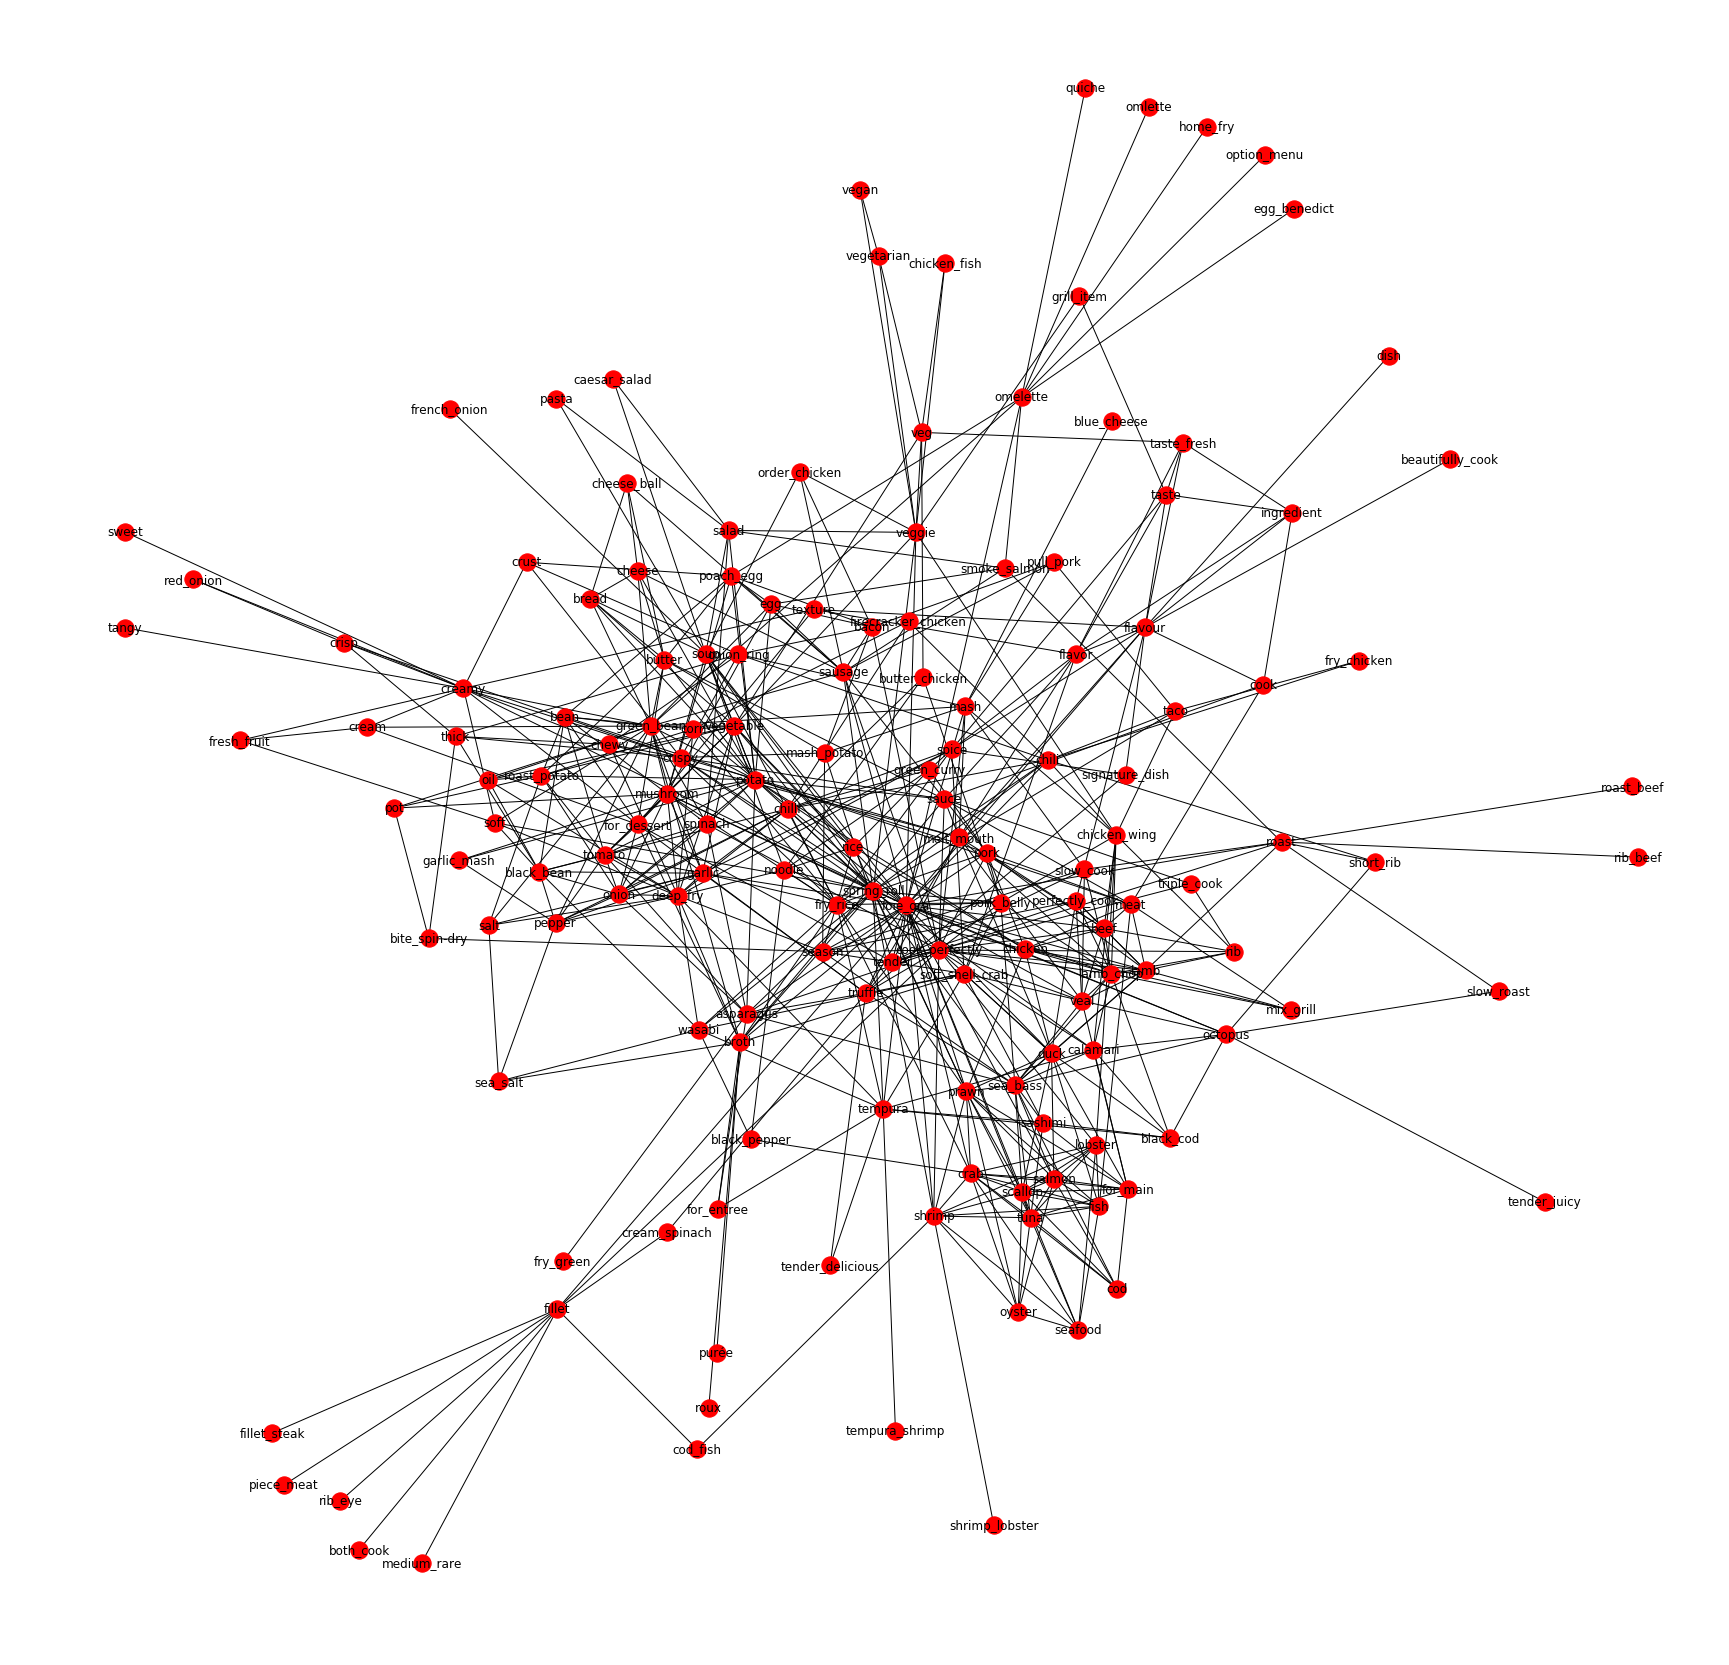

In [84]:
fig = plt.figure(figsize=(30,30))
plt.subplot(111)
sub_G5 = ego_graph(G, "foie_gra", 2, center=True, undirected=False)

nx.draw(sub_G5, with_labels=True)

#### Chinese Whispering sub_G5

In [85]:
# Perform clustering of G
chinese_whispers(sub_G5, weighting='top', seed=1337) # the seed parameter can be omitted

# Print the clusters in the descending order of size
print('Cluster ID\tCluster Elements\n')
for label, cluster in sorted(aggregate_clusters(sub_G5).items(), key=lambda e: len(e[1]), reverse=True):
    print('{}\t{}\n'.format(label, cluster))

Cluster ID	Cluster Elements

41	{'thick', 'spice', 'green_curry', 'wasabi', 'roast', 'for_dessert', 'cream', 'soup', 'crispy', 'slow_roast', 'meat', 'broth', 'chili', 'for_entree', 'veg', 'chewy', 'ingredient', 'pasta', 'flavour', 'pepper', 'black_bean', 'veggie', 'roast_potato', 'beef', 'mushroom', 'grill_item', 'octopus', 'butter_chicken', 'duck', 'tempura', 'tender_delicious', 'soft', 'asparagus', 'roux', 'soft_shell_crab', 'tomato', 'taste_fresh', 'bean', 'potato', 'tangy', 'roast_beef', 'taco', 'signature_dish', 'perfectly_cook', 'foie_gra', 'french_onion', 'taste', 'caesar_salad', 'smoke_salmon', 'lamb', 'black_cod', 'mix_grill', 'mash', 'purée', 'fresh_fruit', 'bite_spin-dry', 'pull_pork', 'cook_perfectly', 'truffle', 'creamy', 'sea_salt', 'crust', 'firecracker_chicken', 'poach_egg', 'vegetable', 'calamari', 'season', 'fry_green', 'sweet', 'noodle', 'black_pepper', 'tempura_shrimp', 'cook', 'red_onion', 'flavor', 'chicken_wing', 'chicken_fish', 'rice', 'rib_beef', 'pork', 'short

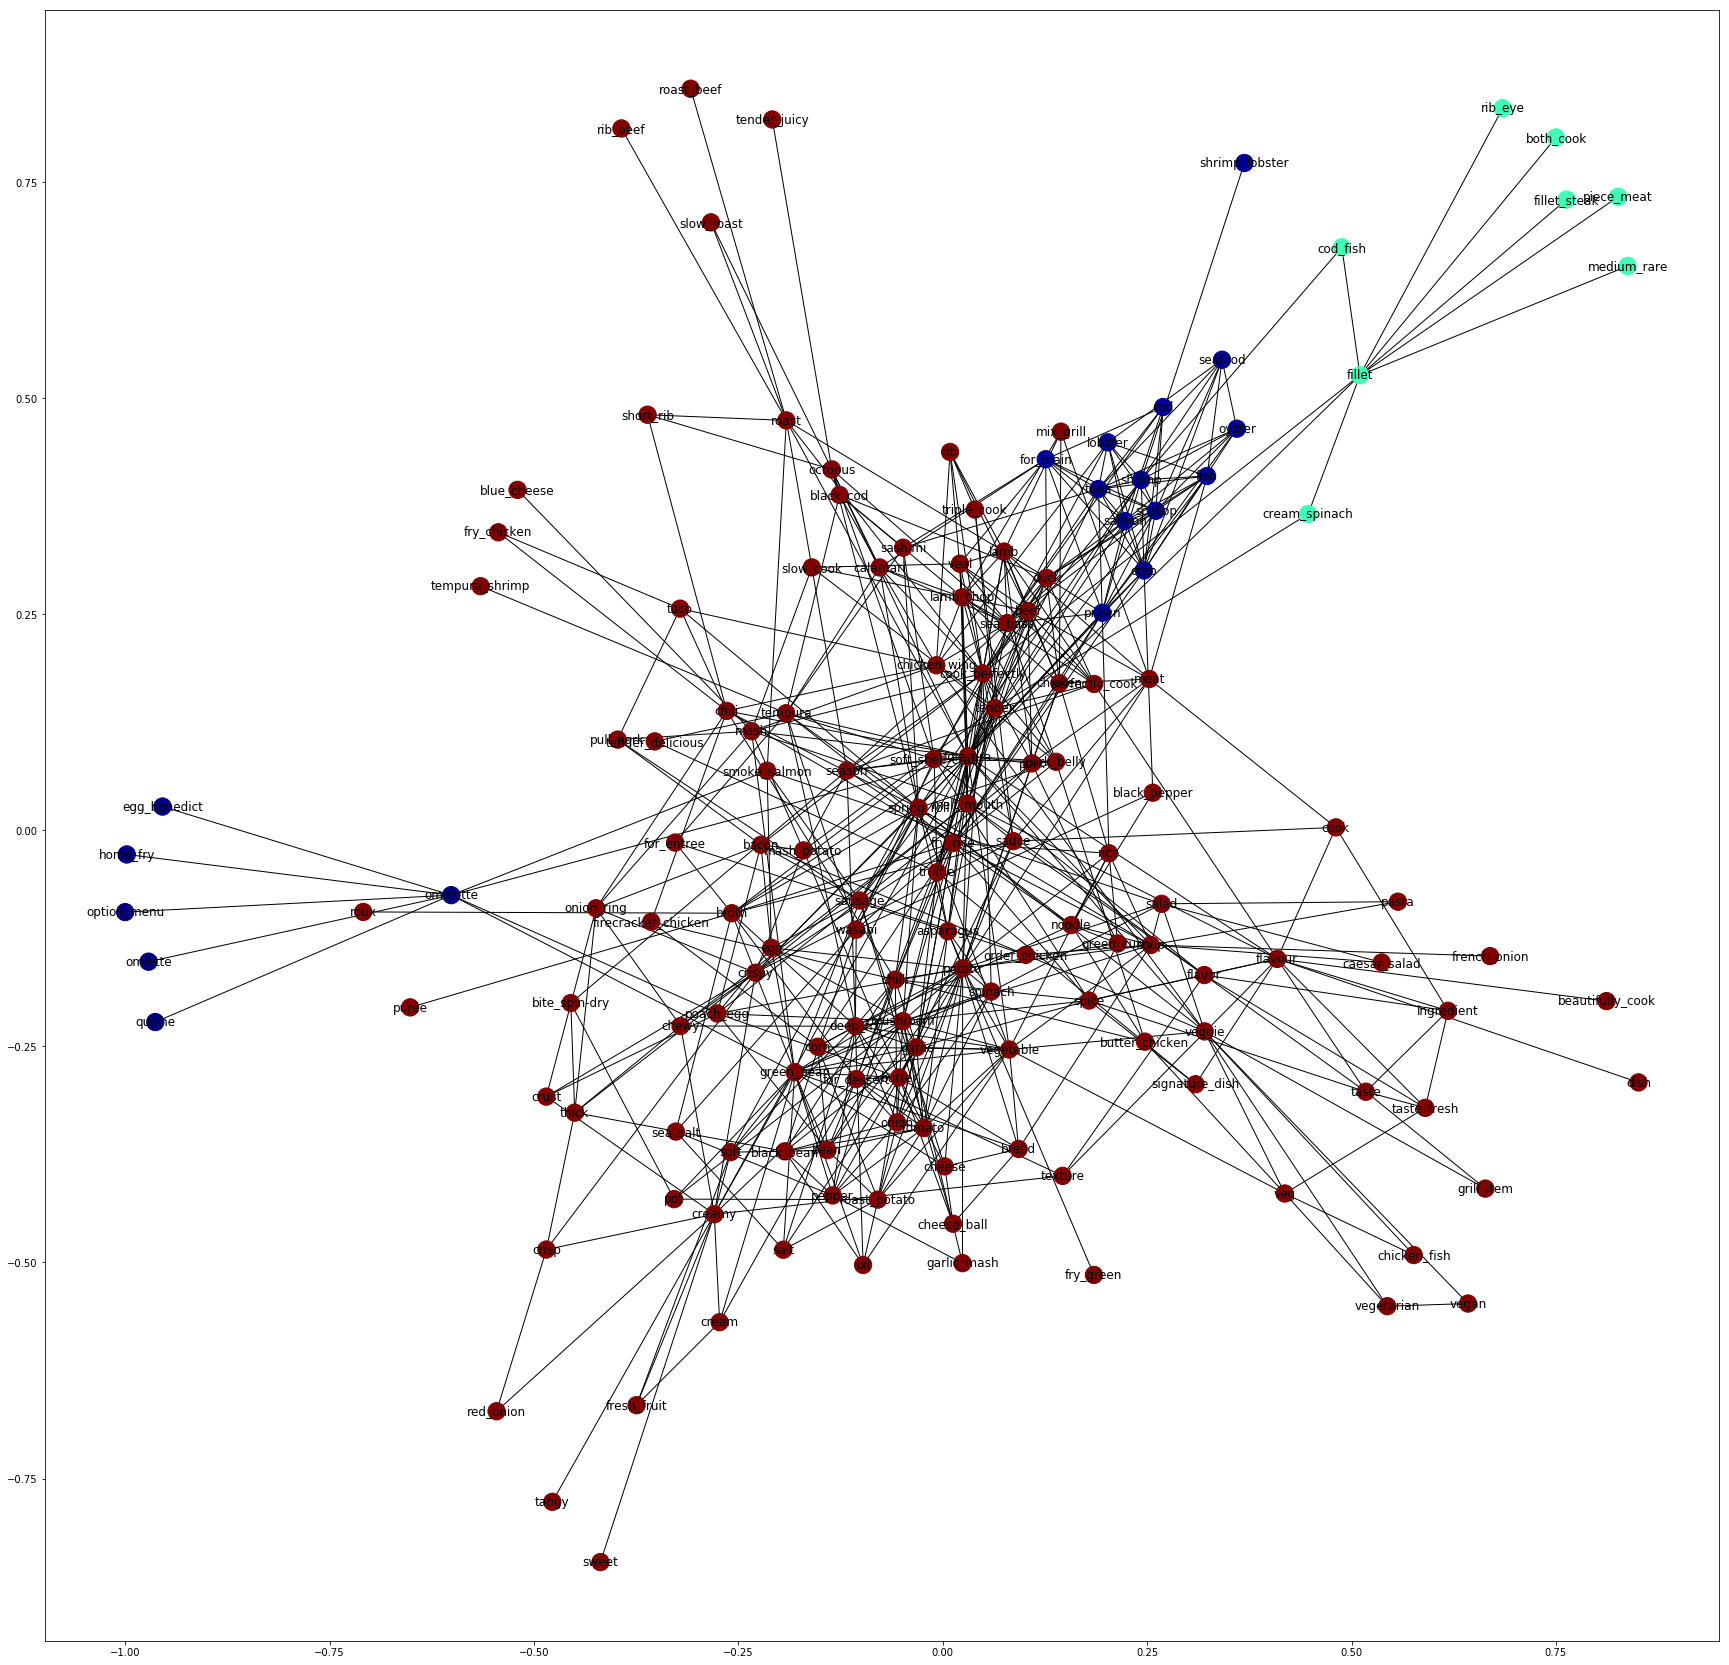

In [86]:
# Visualize the clustering of G using NetworkX (requires matplotlib)
colors = [1. / sub_G5.node[node]['label'] for node in sub_G5.nodes()]
fig = plt.figure(figsize=(30,30))
plt.subplot(111)
# fig = plt.gcf()
# fig.set_size_inches(10, 10)

nx.draw_networkx(sub_G5,cmap=plt.get_cmap('jet'), node_color=colors, font_color='black')

plt.show()

#### Markovian Clustering sub_G5

In [87]:
import markov_clustering as mc
nodelist = list(sub_G5)
        
len(nodelist)

153

In [88]:
# then get the adjacency matrix (in sparse form)
matrix = nx.to_scipy_sparse_matrix(sub_G5)
result = mc.run_mcl(matrix)           # run MCL with default parameters
clusters = mc.get_clusters(result)    # get clusters

In [89]:
clusters

[(0, 18, 20, 41, 50, 55, 83, 85, 97, 117, 126),
 (1,
  12,
  25,
  32,
  39,
  51,
  52,
  58,
  60,
  66,
  87,
  94,
  98,
  109,
  120,
  125,
  135,
  136,
  137,
  138,
  142,
  148,
  150),
 (2, 6, 7, 9, 17, 36, 46, 63, 68, 71, 79, 84, 96, 132),
 (3, 11, 27, 31, 48, 100, 105, 114),
 (4, 15, 34, 35, 59, 75, 82, 144),
 (5, 10, 47, 93, 95),
 (8, 19, 53, 56, 90, 146),
 (13, 38, 62, 70),
 (14, 49, 72, 116),
 (16, 23, 28, 30, 88, 103, 110),
 (21,
  22,
  24,
  26,
  40,
  42,
  43,
  73,
  74,
  102,
  108,
  113,
  115,
  119,
  121,
  123,
  129,
  130,
  133,
  152),
 (29, 128),
 (33, 54, 69, 91, 127, 134),
 (37, 78),
 (44, 45, 77, 86, 89, 92, 104, 107, 111, 112, 122, 143, 147),
 (57, 65, 101, 124, 145, 151),
 (61, 140),
 (64, 131),
 (67,),
 (76,),
 (80, 81),
 (99,),
 (106, 118),
 (139, 149),
 (141,)]

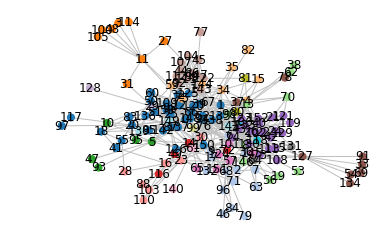

In [90]:
mc.draw_graph(matrix, clusters, node_size=50, with_labels=True, edge_color="silver")

In [91]:
clusters_list_of_lists = [list(elem) for elem in clusters]
row_no = list(range(len(nodelist)))
dictionary = dict(zip(row_no, nodelist))

def replace_all(word_list, dictionary):
   for i, j in dictionary.items():
      for lst in word_list: 
         if i in set(lst): 
            lst[lst.index(i)] = j

replace_all(clusters_list_of_lists, dictionary) 

# source: https://codereview.stackexchange.com/questions/79891/iterate-over-large-list-of-lists-and-replace-its-elements

In [92]:
clusters_labelled = [tuple(l) for l in clusters_list_of_lists]
clusters_labelled

[('spice',
  'ingredient',
  'flavour',
  'taste_fresh',
  'signature_dish',
  'taste',
  'cook',
  'flavor',
  'dish',
  'beautifully_cook',
  'texture'),
 ('green_curry',
  'meat',
  'beef',
  'duck',
  'soft_shell_crab',
  'perfectly_cook',
  'foie_gra',
  'lamb',
  'mix_grill',
  'cook_perfectly',
  'chicken_wing',
  'pork',
  'lamb_chop',
  'veal',
  'chicken',
  'sea_bass',
  'fry_rice',
  'rib',
  'melt_mouth',
  'spring_roll',
  'slow_cook',
  'pork_belly',
  'mash_potato'),
 ('thick',
  'for_dessert',
  'cream',
  'crispy',
  'chewy',
  'soft',
  'tangy',
  'fresh_fruit',
  'creamy',
  'crust',
  'sweet',
  'red_onion',
  'crisp',
  'onion_ring'),
 ('fillet_steak',
  'fillet',
  'cod_fish',
  'cream_spinach',
  'medium_rare',
  'both_cook',
  'piece_meat',
  'rib_eye'),
 ('wasabi',
  'for_entree',
  'tempura',
  'tender_delicious',
  'black_cod',
  'calamari',
  'tempura_shrimp',
  'sashimi'),
 ('roast', 'slow_roast', 'roast_beef', 'rib_beef', 'short_rib'),
 ('soup', 'pasta', 

#### Choosing hyper parameter for sub_G5

In [93]:
# perform clustering using different inflation values
# for each clustering run, calculate the modularity
inflation_auto = []
for inflation in [i / 10 for i in range(15, 40)]:
    result = mc.run_mcl(matrix, inflation=inflation)
    clusters = mc.get_clusters(result)
    Q = mc.modularity(matrix=result, clusters=clusters)
#     print("inflation:", inflation, "modularity:", Q)
    inflation_auto.append((inflation, Q))
    
cols =['inflation', 'modularity']
result_inflation_auto = pd.DataFrame(inflation_auto, columns=cols)
result_inflation_auto

inflation  modularity
0         1.5    0.760135
1         1.6    0.783716
2         1.7    0.799949
3         1.8    0.801487
4         1.9    0.798368
5         2.0    0.766714
6         2.1    0.768081
7         2.2    0.765304
8         2.3    0.754710
9         2.4    0.734376
10        2.5    0.723867
11        2.6    0.700970
12        2.7    0.683327
13        2.8    0.661370
14        2.9    0.639412
15        3.0    0.621257
16        3.1    0.608698
17        3.2    0.583494
18        3.3    0.565167
19        3.4    0.558802
20        3.5    0.540220
21        3.6    0.522064
22        3.7    0.484301
23        3.8    0.472169
24        3.9    0.459610

In [94]:
# result_inflation_auto.loc[max(result_inflation_auto['modularity']), 'inflation']
inflate_value = result_inflation_auto.loc[result_inflation_auto['modularity']==result_inflation_auto['modularity'].max(), 'inflation'].iloc[0]
inflate_value

1.8

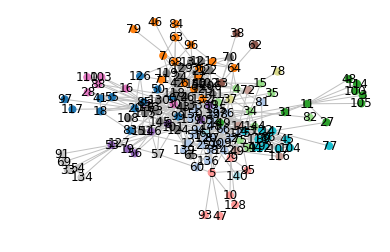

In [95]:
# cluster using the optimized cluster inflation value
result = mc.run_mcl(matrix, expansion=2, inflation=inflate_value)
clusters = mc.get_clusters(result)
mc.draw_graph(matrix, clusters, node_size=50, with_labels=True, edge_color="silver")

In [97]:
clusters

[(0, 18, 20, 41, 50, 55, 83, 85, 97, 99, 117, 126),
 (1,
  12,
  25,
  32,
  39,
  51,
  52,
  58,
  60,
  66,
  76,
  81,
  87,
  94,
  98,
  109,
  120,
  125,
  135,
  136,
  137,
  138,
  139,
  142,
  148,
  150),
 (2, 6, 7, 9, 17, 36, 46, 63, 64, 68, 71, 79, 84, 96, 132),
 (3, 11, 27, 31, 48, 100, 105, 114, 149),
 (4, 15, 34, 35, 59, 67, 75, 82, 144),
 (5, 10, 29, 47, 93, 95, 128),
 (8, 19, 53, 56, 80, 90, 146),
 (13, 38, 62),
 (14, 49, 72, 116),
 (16, 23, 28, 30, 88, 103, 110),
 (21,
  22,
  24,
  26,
  40,
  42,
  43,
  65,
  70,
  73,
  74,
  101,
  102,
  106,
  108,
  113,
  115,
  118,
  119,
  121,
  123,
  124,
  129,
  130,
  131,
  133,
  141,
  145,
  151,
  152),
 (33, 54, 57, 69, 91, 127, 134),
 (37, 78),
 (44, 45, 77, 86, 89, 92, 104, 107, 111, 112, 122, 143, 147),
 (61, 140)]

In [96]:
clusters_list_of_lists = [list(elem) for elem in clusters]
row_no = list(range(len(nodelist)))
dictionary = dict(zip(row_no, nodelist))
def replace_all(word_list, dictionary):
   for i, j in dictionary.items():
      for lst in word_list: 
         if i in set(lst): 
            lst[lst.index(i)] = j

replace_all(clusters_list_of_lists, dictionary) 

# source: https://codereview.stackexchange.com/questions/79891/iterate-over-large-list-of-lists-and-replace-its-elements

clusters_labelled = [tuple(l) for l in clusters_list_of_lists]
clusters_labelled

[('spice',
  'ingredient',
  'flavour',
  'taste_fresh',
  'signature_dish',
  'taste',
  'cook',
  'flavor',
  'dish',
  'sauce',
  'beautifully_cook',
  'texture'),
 ('green_curry',
  'meat',
  'beef',
  'duck',
  'soft_shell_crab',
  'perfectly_cook',
  'foie_gra',
  'lamb',
  'mix_grill',
  'cook_perfectly',
  'season',
  'black_pepper',
  'chicken_wing',
  'pork',
  'lamb_chop',
  'veal',
  'chicken',
  'sea_bass',
  'fry_rice',
  'rib',
  'melt_mouth',
  'spring_roll',
  'triple_cook',
  'slow_cook',
  'pork_belly',
  'mash_potato'),
 ('thick',
  'for_dessert',
  'cream',
  'crispy',
  'chewy',
  'soft',
  'tangy',
  'fresh_fruit',
  'bite_spin-dry',
  'creamy',
  'crust',
  'sweet',
  'red_onion',
  'crisp',
  'onion_ring'),
 ('fillet_steak',
  'fillet',
  'cod_fish',
  'cream_spinach',
  'medium_rare',
  'both_cook',
  'piece_meat',
  'rib_eye',
  'tender'),
 ('wasabi',
  'for_entree',
  'tempura',
  'tender_delicious',
  'black_cod',
  'truffle',
  'calamari',
  'tempura_shrim

#### Ego Graph building for sub_G4 from G

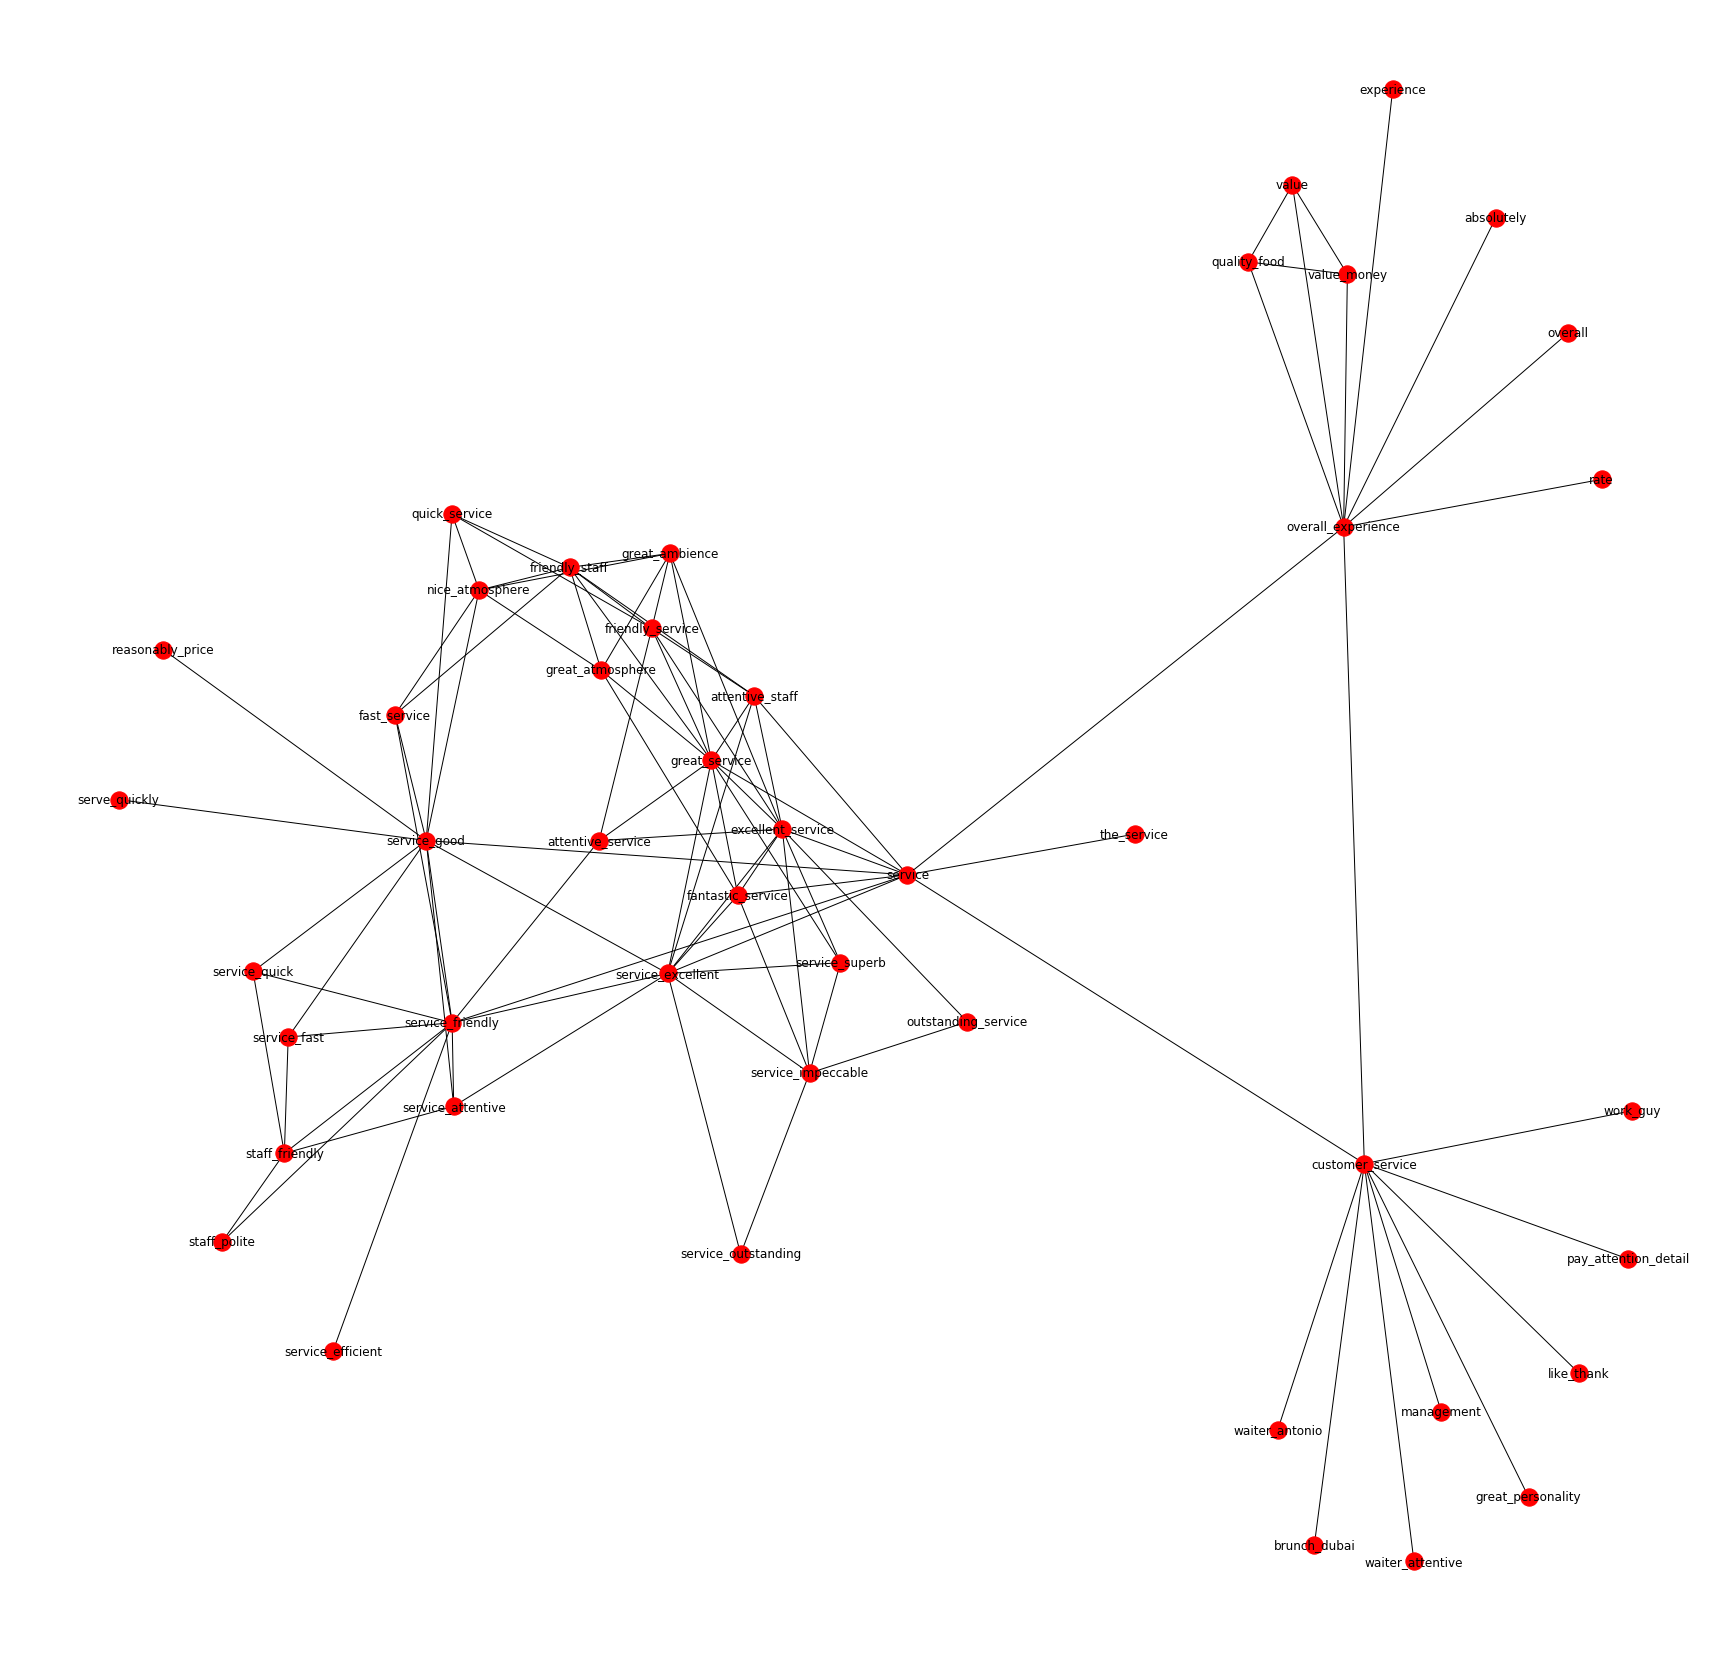

In [98]:
fig = plt.figure(figsize=(30,30))
plt.subplot(111)
sub_G4 = ego_graph(G, "service", 2, center=True, undirected=False)

nx.draw(sub_G4, with_labels=True)

#### Chinese Whispering sub_G4

In [99]:
# Perform clustering of G
chinese_whispers(sub_G4, weighting='top', seed=1337) # the seed parameter can be omitted

# Print the clusters in the descending order of size
print('Cluster ID\tCluster Elements\n')
for label, cluster in sorted(aggregate_clusters(sub_G4).items(), key=lambda e: len(e[1]), reverse=True):
    print('{}\t{}\n'.format(label, cluster))

Cluster ID	Cluster Elements

8	{'pay_attention_detail', 'waiter_antonio', 'work_guy', 'experience', 'like_thank', 'waiter_attentive', 'management', 'rate', 'customer_service', 'overall', 'brunch_dubai', 'great_personality', 'absolutely', 'overall_experience'}

46	{'service_outstanding', 'the_service', 'outstanding_service', 'fantastic_service', 'service_superb', 'service_excellent', 'attentive_service', 'attentive_staff', 'friendly_service', 'excellent_service', 'service', 'great_service', 'service_impeccable'}

40	{'service_fast', 'service_attentive', 'staff_polite', 'service_friendly', 'service_good', 'service_efficient', 'service_quick', 'serve_quickly', 'reasonably_price', 'staff_friendly'}

36	{'nice_atmosphere', 'fast_service', 'quick_service', 'great_ambience', 'friendly_staff', 'great_atmosphere'}

30	{'quality_food', 'value_money', 'value'}



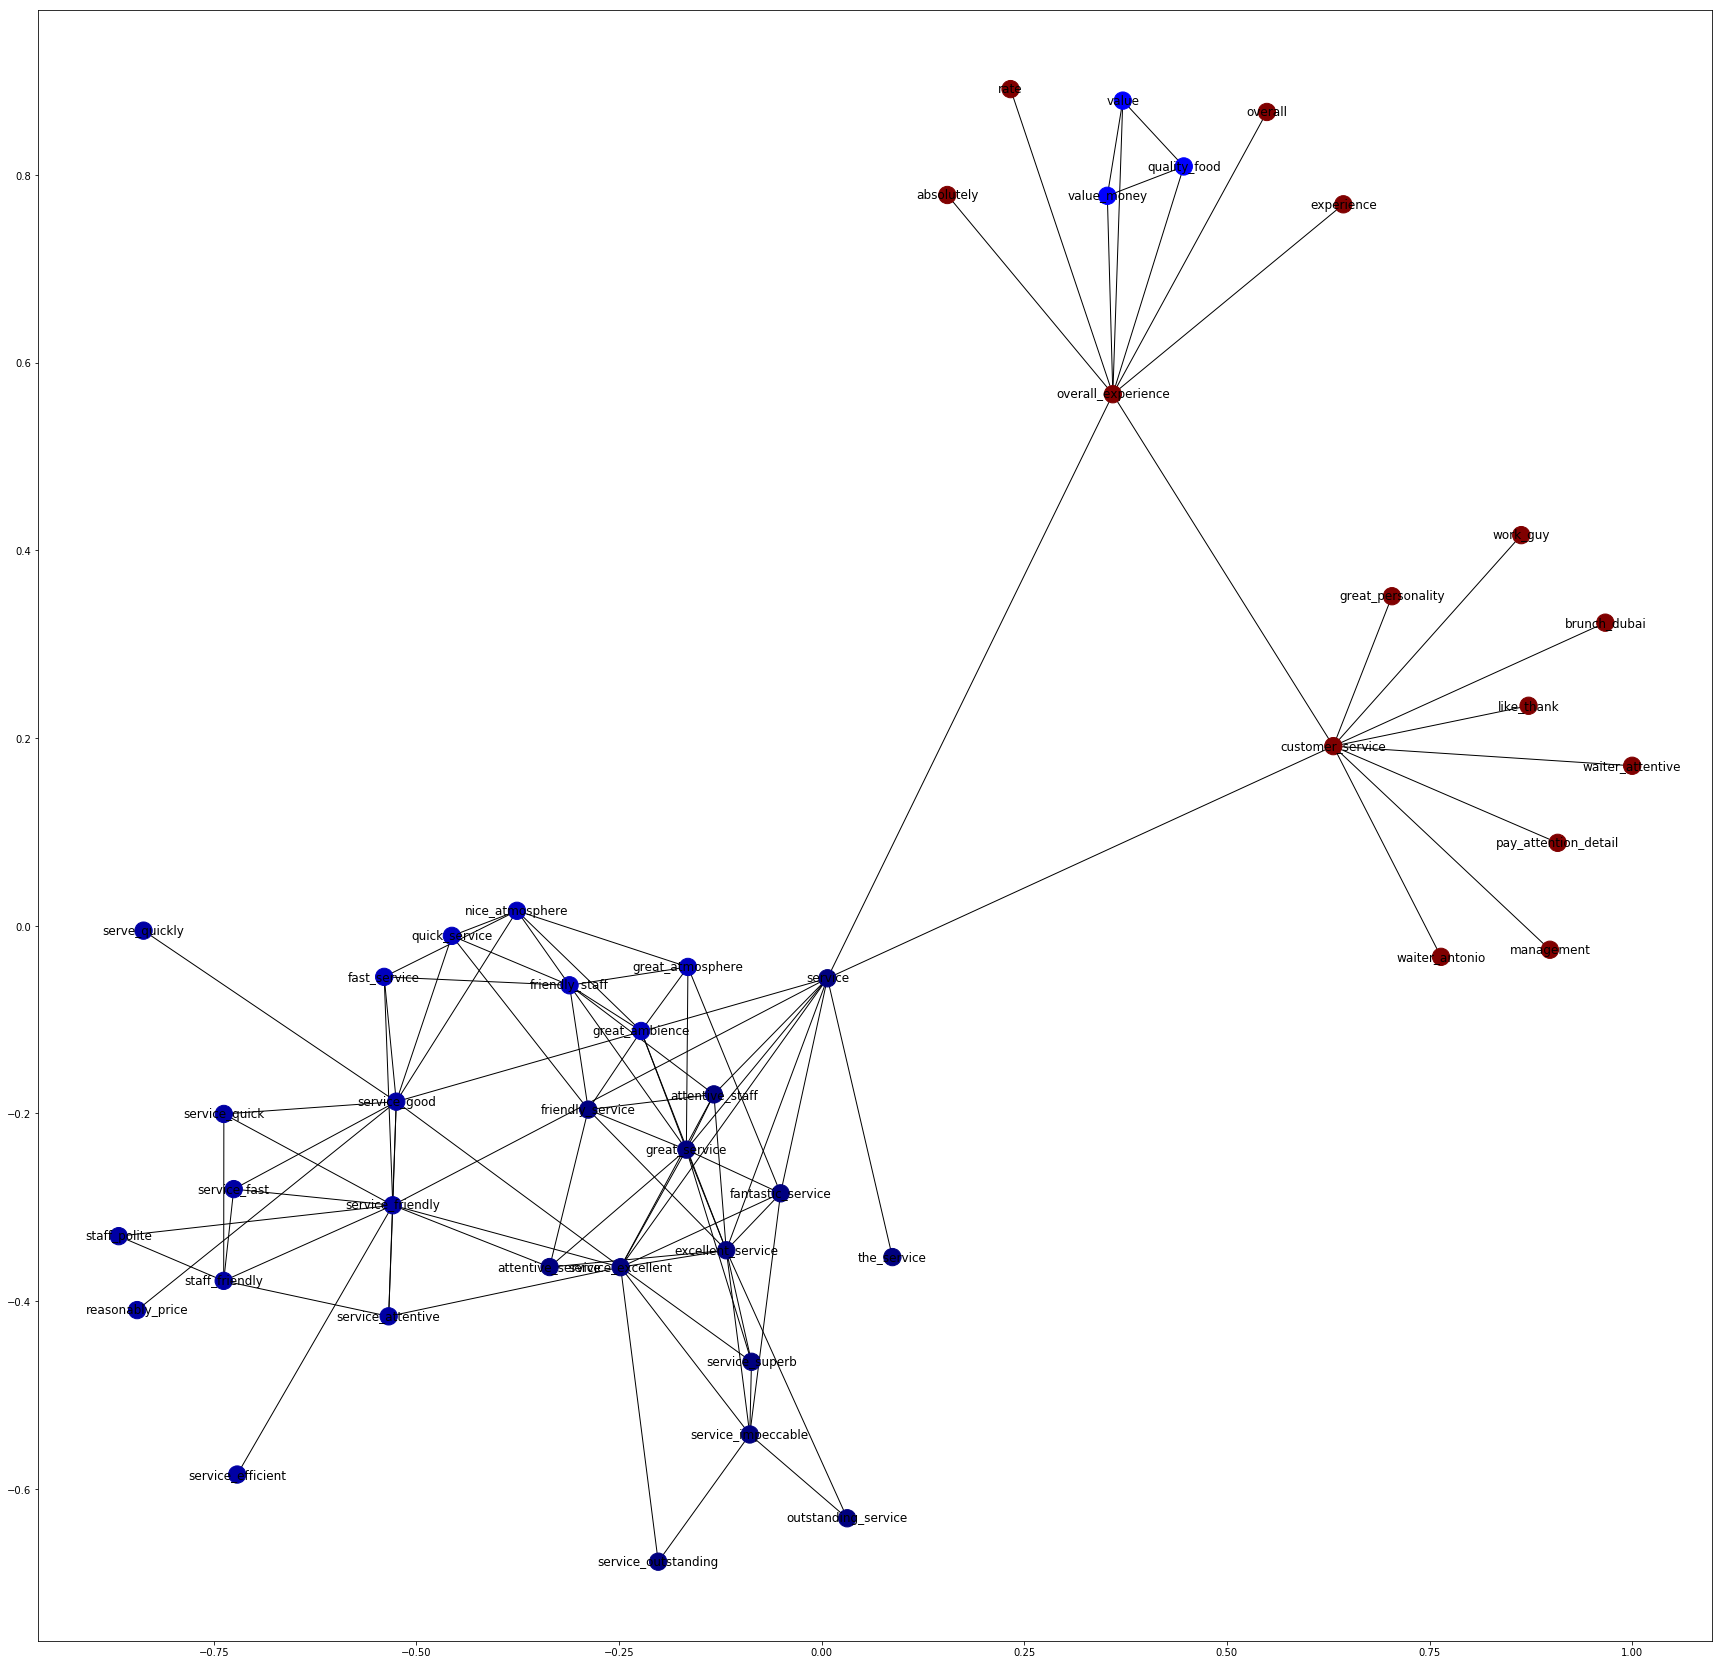

In [100]:
# Visualize the clustering of G using NetworkX (requires matplotlib)
colors = [1. / sub_G4.node[node]['label'] for node in sub_G4.nodes()]
fig = plt.figure(figsize=(30,30))
plt.subplot(111)
# fig = plt.gcf()
# fig.set_size_inches(10, 10)

nx.draw_networkx(sub_G4,cmap=plt.get_cmap('jet'), node_color=colors, font_color='black')

plt.show()

#### Markovian Clustering sub_G4

In [101]:
import markov_clustering as mc
nodelist = list(sub_G4)
        
len(nodelist)

46

In [102]:
# then get the adjacency matrix (in sparse form)
matrix = nx.to_scipy_sparse_matrix(sub_G4)
result = mc.run_mcl(matrix)           # run MCL with default parameters
clusters = mc.get_clusters(result)    # get clusters

In [103]:
clusters

[(0, 1, 2, 3, 4, 10, 12, 16, 18, 20, 24, 25, 27, 31, 33, 35, 43, 45),
 (5, 9, 15, 17, 21, 23, 26, 34, 37),
 (6, 8, 13, 14, 22, 36, 38, 39, 40, 41, 44),
 (7, 11, 19, 28, 29, 30, 32, 42)]

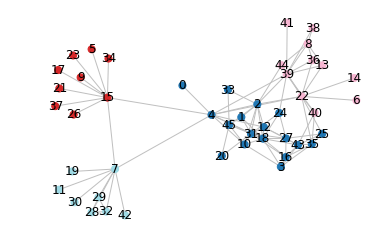

In [104]:
mc.draw_graph(matrix, clusters, node_size=50, with_labels=True, edge_color="silver")

In [105]:
clusters_list_of_lists = [list(elem) for elem in clusters]
row_no = list(range(len(nodelist)))
dictionary = dict(zip(row_no, nodelist))

def replace_all(word_list, dictionary):
   for i, j in dictionary.items():
      for lst in word_list: 
         if i in set(lst): 
            lst[lst.index(i)] = j

replace_all(clusters_list_of_lists, dictionary) 

# source: https://codereview.stackexchange.com/questions/79891/iterate-over-large-list-of-lists-and-replace-its-elements

In [106]:
clusters_labelled = [tuple(l) for l in clusters_list_of_lists]
clusters_labelled

[('the_service',
  'service_superb',
  'service_excellent',
  'great_atmosphere',
  'service',
  'fantastic_service',
  'attentive_staff',
  'great_ambience',
  'great_service',
  'outstanding_service',
  'attentive_service',
  'quick_service',
  'friendly_service',
  'excellent_service',
  'service_outstanding',
  'nice_atmosphere',
  'friendly_staff',
  'service_impeccable'),
 ('great_personality',
  'pay_attention_detail',
  'customer_service',
  'brunch_dubai',
  'like_thank',
  'waiter_attentive',
  'management',
  'waiter_antonio',
  'work_guy'),
 ('reasonably_price',
  'staff_friendly',
  'service_quick',
  'serve_quickly',
  'service_good',
  'service_fast',
  'staff_polite',
  'service_friendly',
  'fast_service',
  'service_efficient',
  'service_attentive'),
 ('overall_experience',
  'experience',
  'absolutely',
  'quality_food',
  'value_money',
  'overall',
  'value',
  'rate')]

#### Choosing hyper parameter for sub_G4

In [107]:
# perform clustering using different inflation values
# for each clustering run, calculate the modularity
inflation_auto = []
for inflation in [i / 10 for i in range(15, 40)]:
    result = mc.run_mcl(matrix, inflation=inflation)
    clusters = mc.get_clusters(result)
    Q = mc.modularity(matrix=result, clusters=clusters)
#     print("inflation:", inflation, "modularity:", Q)
    inflation_auto.append((inflation, Q))
    
cols =['inflation', 'modularity']
result_inflation_auto = pd.DataFrame(inflation_auto, columns=cols)
result_inflation_auto

inflation  modularity
0         1.5    0.490548
1         1.6    0.655955
2         1.7    0.655955
3         1.8    0.655955
4         1.9    0.655955
5         2.0    0.655955
6         2.1    0.655955
7         2.2    0.695652
8         2.3    0.698488
9         2.4    0.683365
10        2.5    0.683365
11        2.6    0.682420
12        2.7    0.682420
13        2.8    0.682420
14        2.9    0.670132
15        3.0    0.647448
16        3.1    0.631380
17        3.2    0.631380
18        3.3    0.568998
19        3.4    0.534026
20        3.5    0.497164
21        3.6    0.477316
22        3.7    0.456522
23        3.8    0.436673
24        3.9    0.415879

In [108]:
# result_inflation_auto.loc[max(result_inflation_auto['modularity']), 'inflation']
inflate_value = result_inflation_auto.loc[result_inflation_auto['modularity']==result_inflation_auto['modularity'].max(), 'inflation'].iloc[0]
inflate_value

2.3

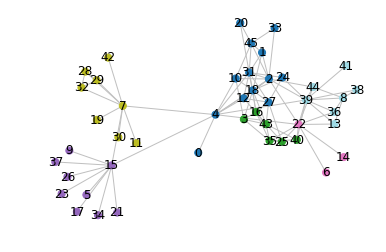

In [109]:
# cluster using the optimized cluster inflation value
result = mc.run_mcl(matrix, expansion=2, inflation=inflate_value)
clusters = mc.get_clusters(result)
mc.draw_graph(matrix, clusters, node_size=50, with_labels=True, edge_color="silver")

In [110]:
clusters

[(0, 1, 2, 4, 10, 12, 18, 20, 24, 27, 31, 33, 45),
 (3, 16, 25, 35, 40, 43),
 (5, 9, 15, 17, 21, 23, 26, 34, 37),
 (6, 14, 22),
 (7, 11, 19, 28, 29, 30, 32, 42),
 (8, 13, 36, 38, 39, 41, 44)]

In [111]:
clusters_list_of_lists = [list(elem) for elem in clusters]
row_no = list(range(len(nodelist)))
dictionary = dict(zip(row_no, nodelist))
def replace_all(word_list, dictionary):
   for i, j in dictionary.items():
      for lst in word_list: 
         if i in set(lst): 
            lst[lst.index(i)] = j

replace_all(clusters_list_of_lists, dictionary) 

# source: https://codereview.stackexchange.com/questions/79891/iterate-over-large-list-of-lists-and-replace-its-elements

clusters_labelled = [tuple(l) for l in clusters_list_of_lists]
clusters_labelled

[('the_service',
  'service_superb',
  'service_excellent',
  'service',
  'fantastic_service',
  'attentive_staff',
  'great_service',
  'outstanding_service',
  'attentive_service',
  'friendly_service',
  'excellent_service',
  'service_outstanding',
  'service_impeccable'),
 ('great_atmosphere',
  'great_ambience',
  'quick_service',
  'nice_atmosphere',
  'fast_service',
  'friendly_staff'),
 ('great_personality',
  'pay_attention_detail',
  'customer_service',
  'brunch_dubai',
  'like_thank',
  'waiter_attentive',
  'management',
  'waiter_antonio',
  'work_guy'),
 ('reasonably_price', 'serve_quickly', 'service_good'),
 ('overall_experience',
  'experience',
  'absolutely',
  'quality_food',
  'value_money',
  'overall',
  'value',
  'rate'),
 ('staff_friendly',
  'service_quick',
  'service_fast',
  'staff_polite',
  'service_friendly',
  'service_efficient',
  'service_attentive')]

#### Ego Graph building for sub_G2 from G

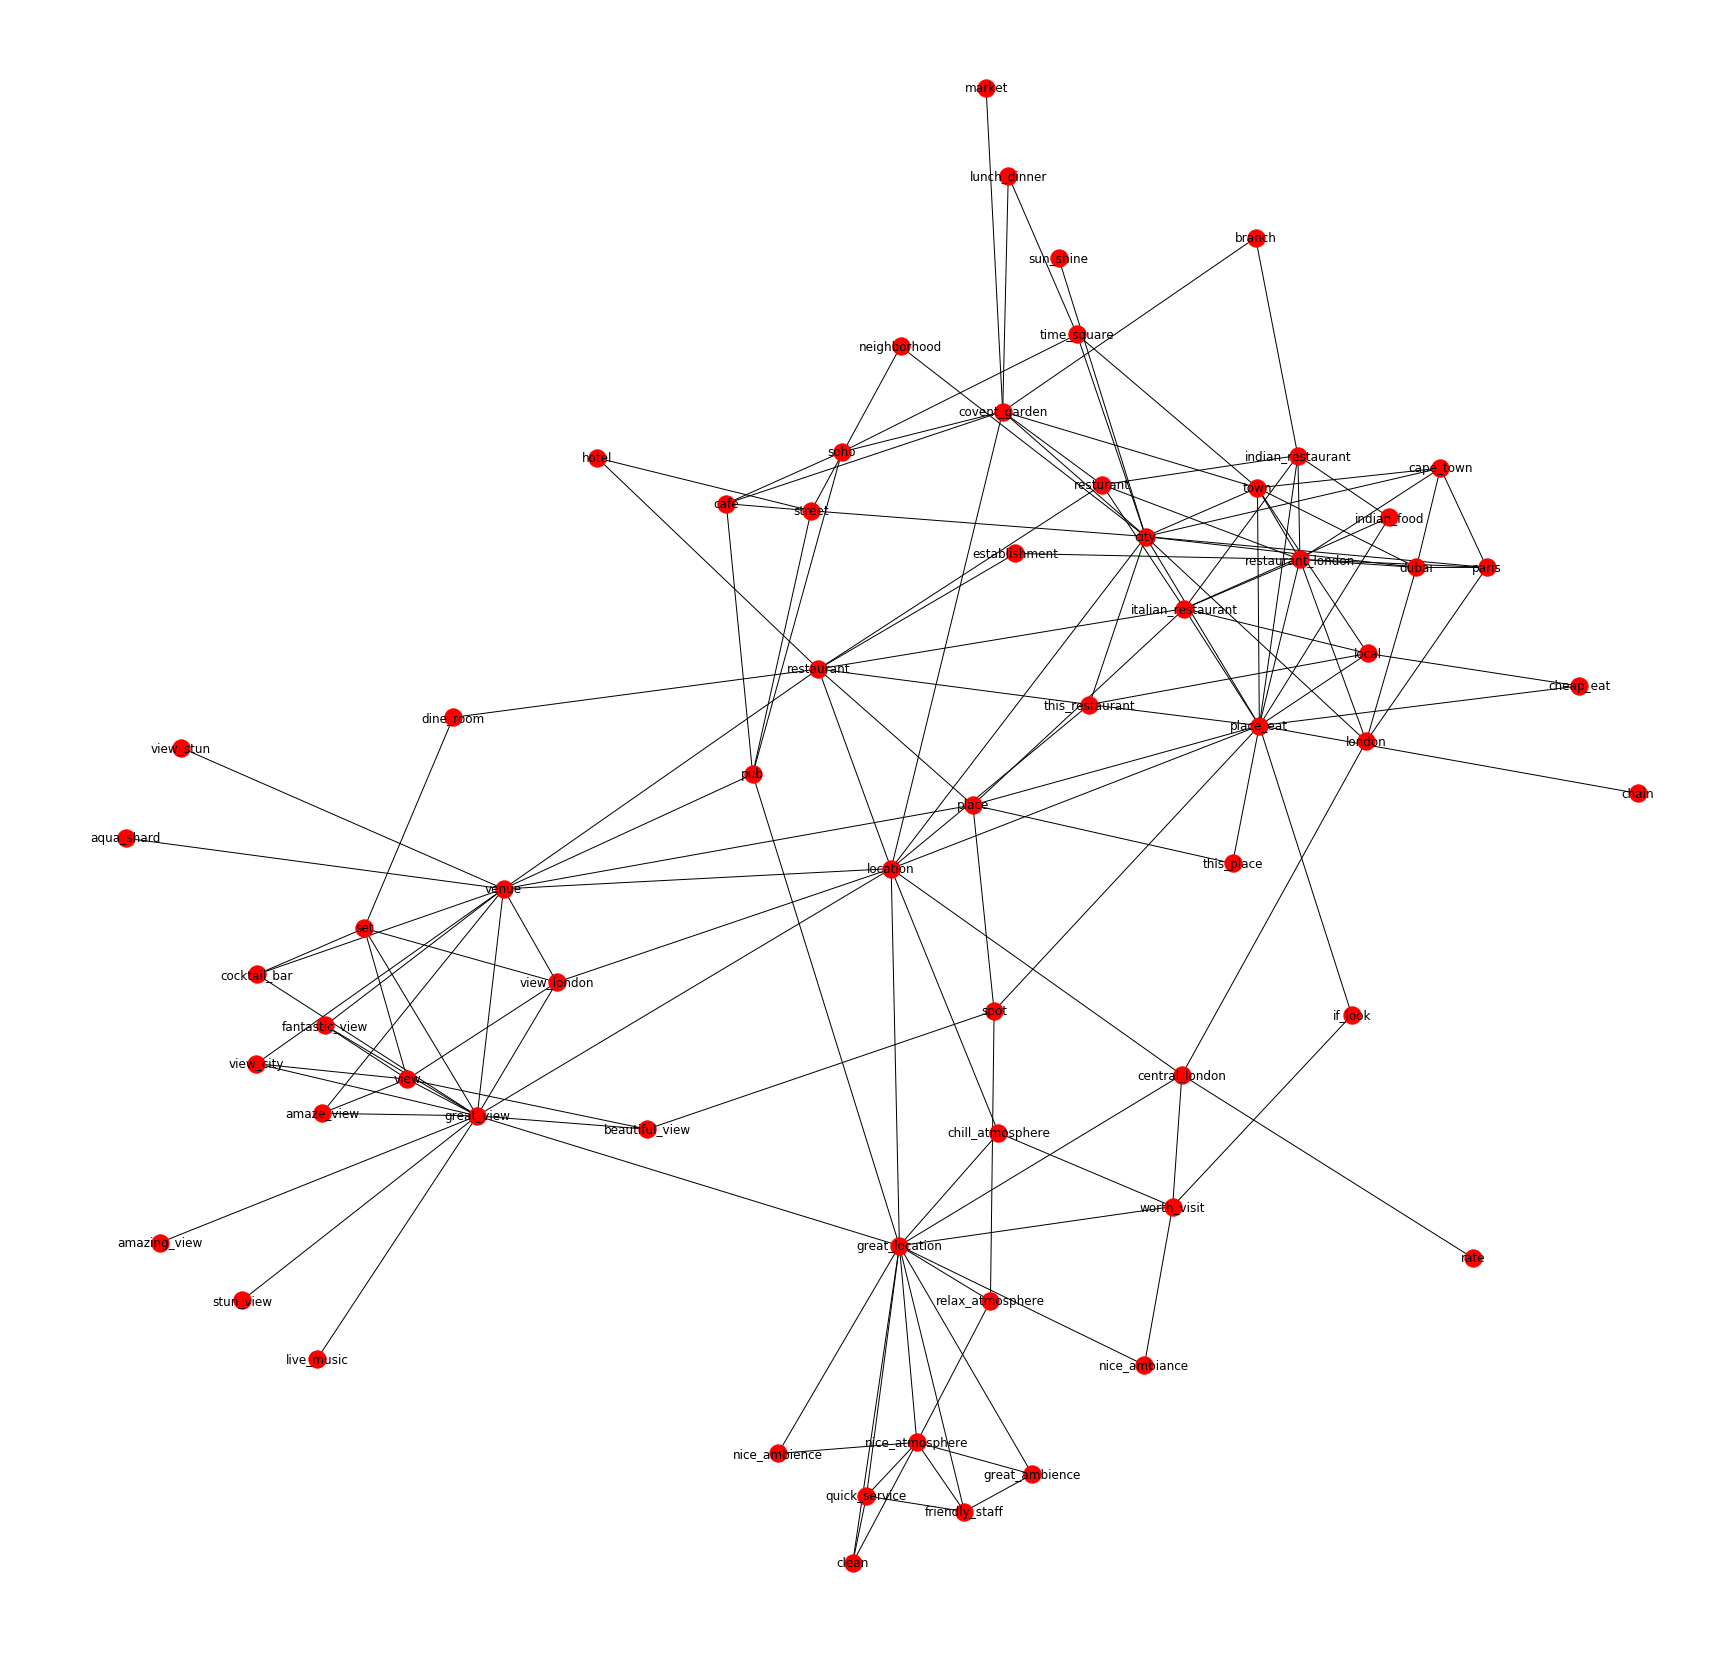

In [112]:
fig = plt.figure(figsize=(30,30))
plt.subplot(111)
sub_G2 = ego_graph(G, "location", 2, center=True, undirected=False)

nx.draw(sub_G2, with_labels=True)

#### Chinese Whispering sub_G2

In [113]:
# Perform clustering of G
chinese_whispers(sub_G2, weighting='top', seed=1337) # the seed parameter can be omitted

# Print the clusters in the descending order of size
print('Cluster ID\tCluster Elements\n')
for label, cluster in sorted(aggregate_clusters(sub_G2).items(), key=lambda e: len(e[1]), reverse=True):
    print('{}\t{}\n'.format(label, cluster))

Cluster ID	Cluster Elements

29	{'stun_view', 'location', 'cocktail_bar', 'dine_room', 'live_music', 'restaurant', 'beautiful_view', 'view_city', 'set', 'view', 'amazing_view', 'amaze_view', 'view_london', 'great_view', 'aqua_shard', 'fantastic_view', 'venue', 'view_stun'}

51	{'nice_atmosphere', 'central_london', 'great_location', 'nice_ambience', 'clean', 'quick_service', 'if_look', 'rate', 'worth_visit', 'great_ambience', 'friendly_staff', 'chill_atmosphere', 'relax_atmosphere', 'nice_ambiance'}

25	{'neighborhood', 'market', 'cafe', 'soho', 'hotel', 'street', 'lunch_dinner', 'pub', 'town', 'city', 'sun_shine', 'covent_garden', 'time_square'}

11	{'spot', 'local', 'this_restaurant', 'place_eat', 'this_place', 'place', 'cheap_eat', 'chain'}

35	{'paris', 'dubai', 'cape_town', 'establishment', 'restaurant_london', 'london'}

40	{'italian_restaurant', 'branch', 'indian_restaurant', 'resturant', 'indian_food'}



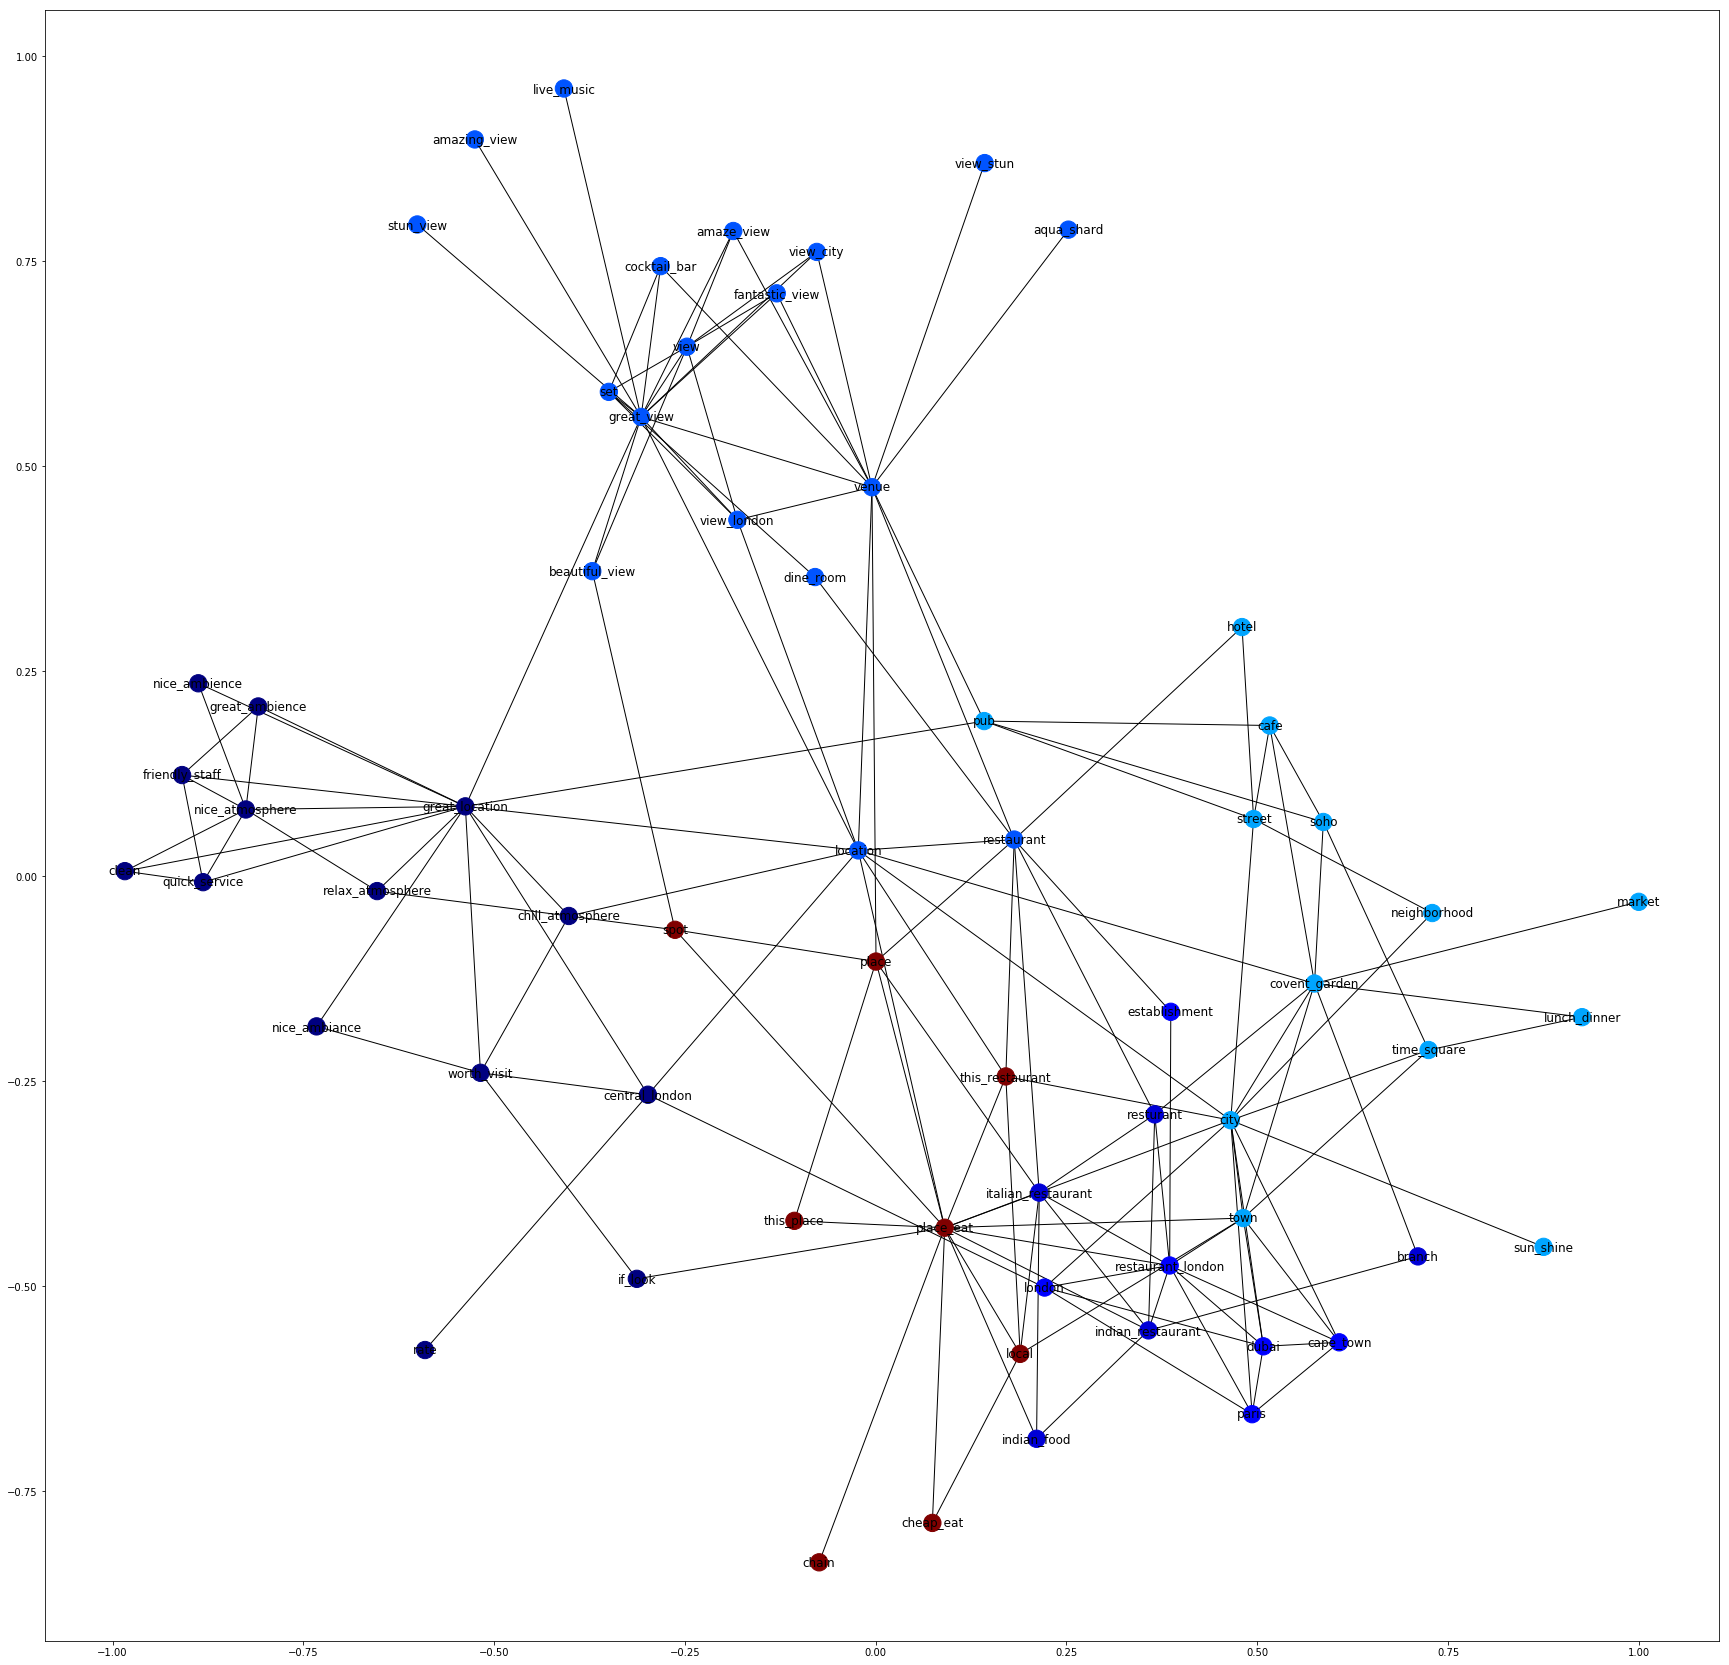

In [114]:
# Visualize the clustering of G using NetworkX (requires matplotlib)
colors = [1. / sub_G2.node[node]['label'] for node in sub_G2.nodes()]
fig = plt.figure(figsize=(30,30))
plt.subplot(111)
# fig = plt.gcf()
# fig.set_size_inches(10, 10)

nx.draw_networkx(sub_G2,cmap=plt.get_cmap('jet'), node_color=colors, font_color='black')

plt.show()

#### Markovian Clustering sub_G2

In [115]:
import markov_clustering as mc
nodelist = list(sub_G2)
        
len(nodelist)

64

In [116]:
# then get the adjacency matrix (in sparse form)
matrix = nx.to_scipy_sparse_matrix(sub_G2)
result = mc.run_mcl(matrix)           # run MCL with default parameters
clusters = mc.get_clusters(result)    # get clusters

In [117]:
clusters

[(0, 2, 10, 13, 17, 33, 39, 44, 45, 46, 60, 61),
 (1, 9, 12, 22, 23, 25, 26, 28, 29, 35, 41, 43, 49, 51, 59, 63),
 (3, 6, 7, 15, 18, 19, 47, 53),
 (4, 5, 11, 14, 16, 27, 30, 32, 37, 38, 40, 50, 54, 56, 58),
 (8, 21, 24, 31, 34, 42, 48, 57, 62),
 (20, 52),
 (36, 55)]

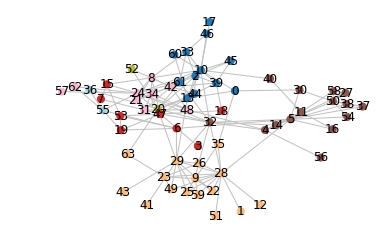

In [118]:
mc.draw_graph(matrix, clusters, node_size=50, with_labels=True, edge_color="silver")

In [119]:
clusters_list_of_lists = [list(elem) for elem in clusters]
row_no = list(range(len(nodelist)))
dictionary = dict(zip(row_no, nodelist))

def replace_all(word_list, dictionary):
   for i, j in dictionary.items():
      for lst in word_list: 
         if i in set(lst): 
            lst[lst.index(i)] = j

replace_all(clusters_list_of_lists, dictionary) 

# source: https://codereview.stackexchange.com/questions/79891/iterate-over-large-list-of-lists-and-replace-its-elements

In [120]:
clusters_labelled = [tuple(l) for l in clusters_list_of_lists]
clusters_labelled

[('spot',
  'italian_restaurant',
  'place_eat',
  'place',
  'chain',
  'local',
  'indian_restaurant',
  'resturant',
  'indian_food',
  'cheap_eat',
  'this_place',
  'this_restaurant'),
 ('stun_view',
  'view',
  'amazing_view',
  'view_city',
  'set',
  'amaze_view',
  'view_london',
  'great_view',
  'venue',
  'beautiful_view',
  'aqua_shard',
  'view_stun',
  'cocktail_bar',
  'live_music',
  'fantastic_view',
  'dine_room'),
 ('market',
  'pub',
  'lunch_dinner',
  'time_square',
  'branch',
  'cafe',
  'covent_garden',
  'soho'),
 ('central_london',
  'great_location',
  'worth_visit',
  'chill_atmosphere',
  'nice_ambiance',
  'great_ambience',
  'relax_atmosphere',
  'location',
  'clean',
  'quick_service',
  'if_look',
  'nice_atmosphere',
  'nice_ambience',
  'rate',
  'friendly_staff'),
 ('town',
  'cape_town',
  'city',
  'paris',
  'dubai',
  'restaurant_london',
  'london',
  'sun_shine',
  'neighborhood'),
 ('restaurant', 'establishment'),
 ('hotel', 'street')]

#### Choosing hyper parameter for sub_G2

In [121]:
# perform clustering using different inflation values
# for each clustering run, calculate the modularity
inflation_auto = []
for inflation in [i / 10 for i in range(15, 40)]:
    result = mc.run_mcl(matrix, inflation=inflation)
    clusters = mc.get_clusters(result)
    Q = mc.modularity(matrix=result, clusters=clusters)
#     print("inflation:", inflation, "modularity:", Q)
    inflation_auto.append((inflation, Q))
    
cols =['inflation', 'modularity']
result_inflation_auto = pd.DataFrame(inflation_auto, columns=cols)
result_inflation_auto

inflation  modularity
0         1.5    0.591797
1         1.6    0.657715
2         1.7    0.724121
3         1.8    0.726074
4         1.9    0.727051
5         2.0    0.716309
6         2.1    0.716309
7         2.2    0.716309
8         2.3    0.698242
9         2.4    0.700195
10        2.5    0.695801
11        2.6    0.684082
12        2.7    0.684082
13        2.8    0.672363
14        2.9    0.664062
15        3.0    0.648926
16        3.1    0.620605
17        3.2    0.606934
18        3.3    0.583496
19        3.4    0.573730
20        3.5    0.549805
21        3.6    0.549316
22        3.7    0.534668
23        3.8    0.534668
24        3.9    0.519531

In [122]:
# result_inflation_auto.loc[max(result_inflation_auto['modularity']), 'inflation']
inflate_value = result_inflation_auto.loc[result_inflation_auto['modularity']==result_inflation_auto['modularity'].max(), 'inflation'].iloc[0]
inflate_value

1.9

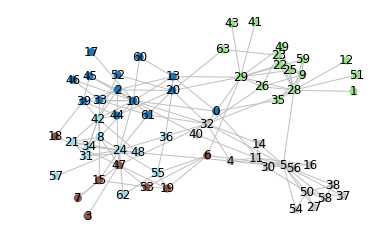

In [123]:
# cluster using the optimized cluster inflation value
result = mc.run_mcl(matrix, expansion=2, inflation=inflate_value)
clusters = mc.get_clusters(result)
mc.draw_graph(matrix, clusters, node_size=50, with_labels=True, edge_color="silver")

In [124]:
clusters

[(0, 2, 10, 13, 17, 20, 33, 39, 44, 45, 46, 52, 60, 61),
 (1, 9, 12, 22, 23, 25, 26, 28, 29, 35, 41, 43, 49, 51, 59, 63),
 (3, 6, 7, 15, 18, 19, 47, 53),
 (4, 5, 11, 14, 16, 27, 30, 32, 37, 38, 40, 50, 54, 56, 58),
 (8, 21, 24, 31, 34, 36, 42, 48, 55, 57, 62)]

In [125]:
clusters_list_of_lists = [list(elem) for elem in clusters]
row_no = list(range(len(nodelist)))
dictionary = dict(zip(row_no, nodelist))
def replace_all(word_list, dictionary):
   for i, j in dictionary.items():
      for lst in word_list: 
         if i in set(lst): 
            lst[lst.index(i)] = j

replace_all(clusters_list_of_lists, dictionary) 

# source: https://codereview.stackexchange.com/questions/79891/iterate-over-large-list-of-lists-and-replace-its-elements

clusters_labelled = [tuple(l) for l in clusters_list_of_lists]
clusters_labelled

[('spot',
  'italian_restaurant',
  'place_eat',
  'place',
  'chain',
  'restaurant',
  'local',
  'indian_restaurant',
  'resturant',
  'indian_food',
  'cheap_eat',
  'establishment',
  'this_place',
  'this_restaurant'),
 ('stun_view',
  'view',
  'amazing_view',
  'view_city',
  'set',
  'amaze_view',
  'view_london',
  'great_view',
  'venue',
  'beautiful_view',
  'aqua_shard',
  'view_stun',
  'cocktail_bar',
  'live_music',
  'fantastic_view',
  'dine_room'),
 ('market',
  'pub',
  'lunch_dinner',
  'time_square',
  'branch',
  'cafe',
  'covent_garden',
  'soho'),
 ('central_london',
  'great_location',
  'worth_visit',
  'chill_atmosphere',
  'nice_ambiance',
  'great_ambience',
  'relax_atmosphere',
  'location',
  'clean',
  'quick_service',
  'if_look',
  'nice_atmosphere',
  'nice_ambience',
  'rate',
  'friendly_staff'),
 ('town',
  'cape_town',
  'city',
  'paris',
  'dubai',
  'hotel',
  'restaurant_london',
  'london',
  'street',
  'sun_shine',
  'neighborhood')]